# Final Project


# Project 1

# Project 1 - Part 1

$$\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2}m\omega^2x^2$$

Targeting an energy scale $\epsilon = \hbar\omega$, a new length scale $x^*$ is defined:

$$x^* = \frac{x}{\sqrt{\frac{\hbar}{m\omega}}} \rightarrow x = x^* \sqrt{\frac{\hbar}{m\omega}}$$

$$dx^* = \frac{dx}{\sqrt{\frac{\hbar}{m\omega}}} \rightarrow \frac{dx^*}{dx} = \frac{1}{\sqrt{\frac{\hbar}{m\omega}}} = \sqrt{\frac{m\omega}{\hbar}}$$

$$\frac{d}{dx} = \frac{d}{dx^*} \left( \frac{dx^*}{dx} \right) = \frac{d}{dx^*} \sqrt{\frac{m\omega}{\hbar}}$$

$$\hat{H} = -\frac{\hbar^2}{2m} \left[ \frac{d^2}{dx^{*2}} \left( \sqrt{\frac{m\omega}{\hbar}} \right)^2 \right] + \frac{1}{2}m\omega^2 \left[ x^{*2} \left( \sqrt{\frac{m\omega}{\hbar}} \right)^2 \right]$$

$$\hat{H} = -\frac{\hbar\omega}{2} \frac{d^2}{dx^{*2}} + \frac{\hbar\omega}{2}x^{*2}$$

Dividing the Halitonian with the targeted energy scale $\epsilon=\hbar\omega$ and defining the dimensionless Hamiltonian:

$$\hat{H}^* = \frac{\hat{H}}{\epsilon} = -\frac{\hbar\omega}{2\epsilon} \frac{d^2}{dx^{*2}} + \frac{\hbar\omega}{2\epsilon} x^{*2}$$

$$\hat{H}^* = -\frac{1}{2} \frac{d^2}{dx^{*2}} + \frac{1}{2} x^{*2}$$

# Project 1 - Part 2

In [107]:
import numpy as np
import matplotlib.pyplot as plt

x_space = np.linspace(-5, 5, 500)
Ux = 0.5 * x_space**2.

def phi_A_func(x_space, A, alpha=2.): 
    return np.exp(-alpha*(x_space - A) ** 2.)

def S_AB_func(xA, xB, alpha): 
    return (0.5*np.pi/alpha)**0.5 * np.exp(-0.5*alpha* (xA - xB)**2 )

def H_AB_func(xA, xB, alpha): 
    return 0.5* S_AB_func(xA, xB, alpha) * (alpha - alpha**2 * (xA - xB)**2 + \
                             0.25*(1/alpha + (xA + xB)**2 ))

def S_H_AB_func(xA, xB, alpha): 
    S_AB =  S_AB_func(xA, xB, alpha)
    H_AB = 0.5* S_AB * (alpha - alpha**2 * (xA - xB)**2 + \
                             0.25*(1/alpha + (xA + xB)**2 ))
    return S_AB, H_AB

def find_eigval_eigvec(S_AB, H_AB):
    S_inv_H = np.linalg.inv(S_AB) @ H_AB
    eigval, eigvec = np.linalg.eig(S_inv_H)
    
    index_sort = np.argsort(eigval)
    eigval_sorted = eigval[index_sort]
    eigvec_sorted = eigvec[:, index_sort]
    
    for i in range(len(eigvec_sorted)):
        eigvec_sorted[:,i] /= np.sqrt(eigvec_sorted[:,i] @ S_AB @ eigvec_sorted[:,i])
        
    return eigval_sorted, eigvec_sorted

E_0: 0.5000000097134011
E_1: 1.500000139284624
E_2: 2.500001117282008


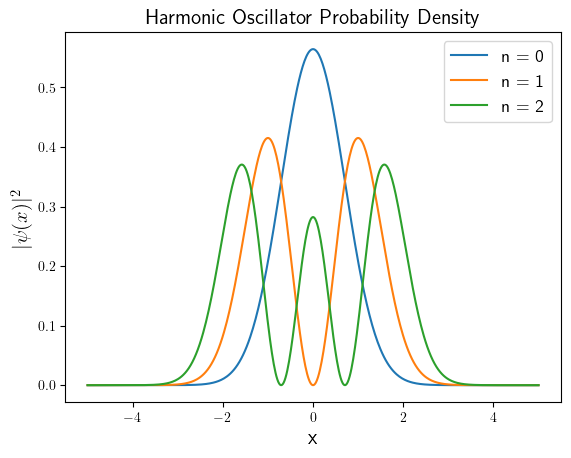

In [108]:
eigval, eigvec = [], []
Psi = {}

n_basis = 15
alpha = 2
indexs = [0, 1, 2]

gaussian_centers = np.linspace(-4, 4, n_basis)
S_AB, H_AB = S_H_AB_func(gaussian_centers[:,None], gaussian_centers[None,:], alpha)
eigval, eigvec = find_eigval_eigvec(S_AB, H_AB)

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots()

for index in indexs:
    print(f'E_{index}: {eigval[index]}')
    Psi[index] = np.zeros_like(x_space)
    gaussian_centers = np.linspace(-4, 4, n_basis)
    for i, g_A in enumerate(gaussian_centers):
        Psi[index] += -1 * phi_A_func(x_space, g_A, alpha) * eigvec[i,index]
    probability_density = Psi[index]**2
    ax.plot(x_space, probability_density, label=r'n = '+str(index))

ax.set_title('Harmonic Oscillator Probability Density', size=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel(r'$|\psi(x)|^2$', size=15)
ax.legend(fontsize=13)
plt.savefig('Visualizations/project_1/p1_p2.png')

Given the energy of the harmonic oscillator is:

$$E_n = (n + \frac{1}{2})$$

The analytical form of partition function $Z$ of a 1D harmonic oscillator can be evaluated using a geometric sum:

$$Z = \sum^{\infty}_{n=0} e^{-\beta E_n} = \sum^{\infty}_{n=0} e^{-\beta (n + \frac{1}{2})} = e^{\frac{-\beta}{2}} \sum^{\infty}_{n=0} e^{-\beta n}$$

$$\sum_{n=0}^{\infty} r^n = \frac{1}{1 - r}, \quad \text{for } |r| < 1$$

$$Z = \frac{e^{-\beta/2}}{1 - e^{-\beta}}$$

Then, the ensemble energy can be evaluated: 

$$\langle E \rangle = -\frac{\partial}{\partial \beta}\ln{Z} \quad \quad \quad C_v = \frac{\partial \langle E \rangle}{\partial T}$$

$$\ln{Z} = \ln{ \left( \frac{e^{-\beta/2}}{1 - e^{-\beta}} \right) } = \frac{-\beta}{2} - \ln{ \left( 1 - e^{-\beta} \right) }$$

$$-\frac{\partial}{\partial \beta} \left[ \frac{-\beta}{2} - \ln{ \left( 1 - e^{-\beta} \right) } \right] = \frac{1}{2} + \frac{e^{-\beta}}{1 - e^{-\beta}} = \frac{1}{2} + \frac{1}{e^{\beta} - 1}$$

Then the heat capacity: 

$$\frac{d \langle E \rangle}{dT} = \frac{d \langle E \rangle}{dx} \cdot \frac{dx}{dT} = \left( -\frac{e^x}{(e^x - 1)^2} \right) \cdot \left( -\frac{1}{T^2} \right) \quad \text{with} \quad x = \frac{1}{T}$$

$$C(T) = \frac{e^{1/T}}{T^2 (e^{1/T} - 1)^2}$$

Setting $k_B = 1$ gives the analytical forms:

$$\langle E \rangle = \frac{1}{2} + \frac{1}{e^{1/T} - 1}$$

$$C(T) = \frac{e^{1/T}}{T^2 (e^{1/T} - 1)^2}$$

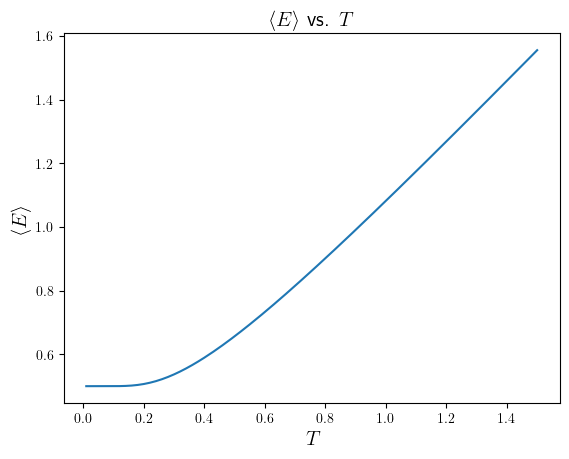

In [111]:
Ts = [(x / 100) for x in range(1, 150 + 1)]

Es_qm = []
Cs_qm = []

for T in Ts:
    E_qm = 0.5 + (np.exp(1 / T) - 1) ** -1
    C_qm = np.exp(1 / T) / (T**2 * (np.exp(1 / T) - 1)**2)
    Es_qm.append(E_qm)
    Cs_qm.append(C_qm)

fig, ax = plt.subplots()
ax.plot(Ts, Es_qm)
ax.set_title(r'$\langle E \rangle$ vs. $T$', size=15)
ax.set_xlabel(r'$T$', size=15)
ax.set_ylabel(r'$\langle E \rangle$', size=15)
plt.savefig('Visualizations/project_1/p1_p2_1.png')

# Project 1 Part 3

In [197]:
import matplotlib.pyplot as plt

class histogram(): 
    def __init__(self,limits,binwidth): 
        self.limits = limits
        self.binwidth = binwidth
        self.vals = np.arange(self.limits[0] + self.binwidth / 2, self.limits[1], self.binwidth) 
        self.histo = 0 * self.vals 
        self.N_samples = 0
        self.mean = 0
        self.mean_square = 0
        self.std_dev = 0
        self.err_of_mean = 0
        self.histo_err = 0

    def add_sample(self,dat): 
        self.N_samples += 1
        if dat > self.limits[0] and dat < self.limits[1]:
            bin_index = int((dat - self.limits[0]) / self.binwidth) 
            self.histo[bin_index] += 1 

    def normalize(self): # normalize data into density plot
        self.histo = self.histo / (self.N_samples * self.binwidth)

    def barplot(self, ax): # plot bar plot with matplotlib
        ax.bar(self.vals, self.histo, width=0.95 * self.binwidth, color='k')

    def compute_mean(self):
        self.mean = np.sum(self.vals * self.histo * self.binwidth)

    def compute_mean_square(self):
        self.mean_square = np.sum((self.vals ** 2) * self.histo * self.binwidth)

    def compute_std_dev(self):
        self.compute_mean()
        self.compute_mean_square()
        self.std_dev = np.sqrt(self.mean_square - (self.mean ** 2))

    def compute_error_of_mean(self):
        self.compute_std_dev()
        self.err_of_mean = np.sqrt(self.std_dev / self.N_samples)

    def compute_histogram_error(self): 
        self.histo_err = np.sqrt(self.histo * (1 - self.histo * self.binwidth) / (self.N_samples * self.binwidth))

    def plot_error_bars(self, ax):
        self.compute_histogram_error()
        ax.errorbar(self.vals, self.histo, 2 * self.histo_err, fmt='None', capsize=3)
        
    def lineplot(self, ax):
        ax.plot(self.vals, self.histo)

In [202]:
from numba import jit
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.01
total_time = 1000
N_steps = int(total_time/delta_t)
Ts = [(x / 100) for x in range(1, 150 + 1)]
k_coll = 1

@jit(nopython=True)
def compute_forces_and_potential(r): 
    forces = -k * r
    potential = 0.5 * k * r**2
    return forces, potential

m = 1.0
freq = 1.0
k = m * freq**2

Es_cm = []
T_totals = []
histograms = []
target_T = [0.5, 1.25]

for T in tqdm(Ts):
    r = 0.0
    v = 0.0

    binwidth = 0.1
    limits = [-5, 5]
    histo_r = histogram(limits, binwidth)

    forces, potential_energy = compute_forces_and_potential(r)
    
    kinetic_traj = np.zeros(N_steps)
    potential_traj = np.zeros(N_steps)
    time_traj = np.arange(N_steps)*delta_t
    for step in range(N_steps): 
        v = v + 0.5 * delta_t * forces 
        r = r + delta_t * v 
        forces, potential_energy = compute_forces_and_potential(r) 
        v = v + 0.5 * delta_t * forces 

        
        kinetic_energy = 0.5 * np.sum( v**2 )
        kinetic_traj[step] = kinetic_energy
        potential_traj[step] = potential_energy
        
        if random.random() < k_coll * delta_t: 
            v = np.random.normal(0, np.sqrt(T / m))

        if T in target_T and step > 500:
            histo_r.add_sample(r)

    E_total = kinetic_traj + potential_traj
    T_totals.append(E_total)
    Es_cm.append(np.mean(E_total[500:]))
    if T in target_T: 
        histograms.append(histo_r)

# fig, ax = plt.subplots()
# ax.plot(Ts, Es_cm)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:37<00:00,  3.95it/s]


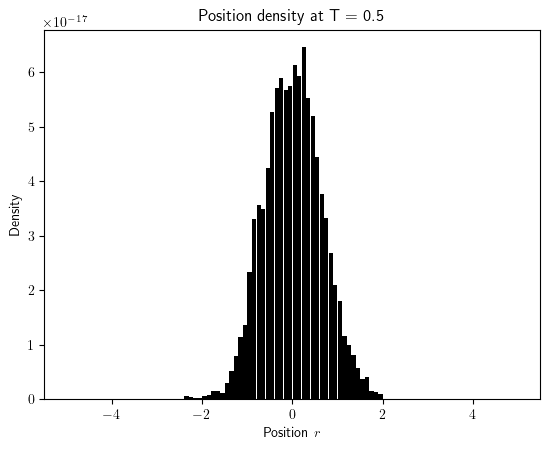

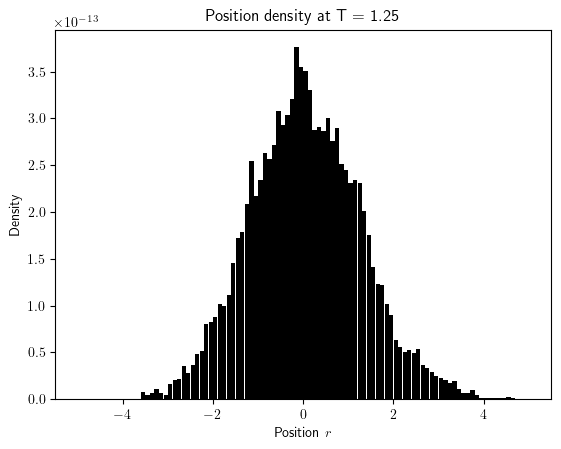

In [218]:
for histo_r, T in zip(histograms, target_T):
    histo_r.normalize()

    fig, ax = plt.subplots()
    histo_r.barplot(ax)
    ax.set_xlabel(r'Position $r$')
    ax.set_ylabel(r'Density')
    ax.set_title(f"Position density at T = {T}")
    plt.savefig(f'Visualizations/project_1/p1_p3_{T}.png')

# Project 1 Part 4

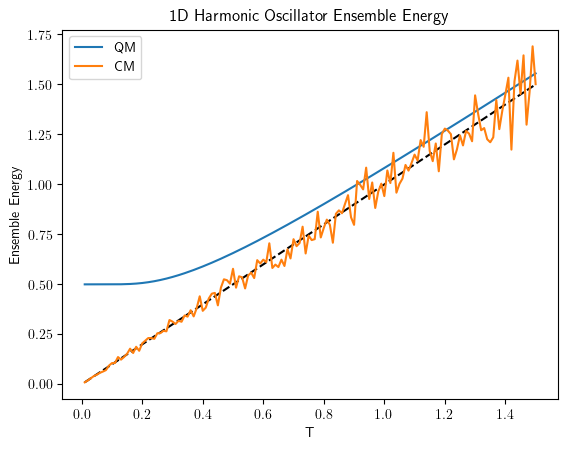

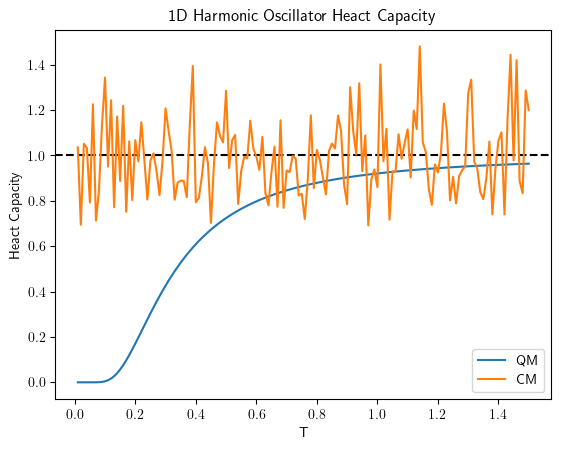

In [114]:
fig, ax = plt.subplots()
ax.plot(Ts, Ts, color='black', ls='--')
ax.plot(Ts, Es_qm, label='QM')
ax.plot(Ts, Es_cm, label='CM')
ax.set_title('1D Harmonic Oscillator Ensemble Energy')
ax.set_xlabel('T')
ax.set_ylabel('Ensemble Energy')
ax.legend()
plt.savefig('Visualizations/project_1/p1_p4_0.png')

Cs_cm = []

for E_total, T in zip(T_totals, Ts):
    E_eq_totals = E_total[500:] # remove first 500 to reach t_relax
    E_avg = np.mean(E_eq_totals)
    E_flux = [(t-E_avg)**2 for t in E_total]
    E_var = np.mean(E_flux)
    Cs_cm.append(E_var / T**2)

fig, ax = plt.subplots()
ax.axhline(y=1, color='black', ls='--')
ax.plot(Ts, Cs_qm, label='QM')
ax.plot(Ts, Cs_cm, label='CM')
ax.set_title('1D Harmonic Oscillator Heact Capacity')
ax.set_xlabel('T')
ax.set_ylabel('Heact Capacity')
ax.legend()
plt.savefig('Visualizations/project_1/p1_p4_1.png')

Plotting both the ensemble energies and heat capacities for analytical forms of the quantum harmonic oscillator and for the simulated classical harmonic oscillator across several temperatures shows the breakdown of the quantum partition funciton when $T < 1.0$. The plot also shows the recovery of the classical partition function when $T > 1.0$. 

# Project 2

# Project 2 Part 1

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from tqdm import tqdm

# Analytical primitive gaussian integrals

def F0(x): # needed in analytical primitive gaussian integrals
    if (x < 1e-8):
        return 1 - x/3
    else:
        return 0.5*np.sqrt(np.pi)*special.erf(np.sqrt(x))/np.sqrt(x)

def compute_overlap(alpha, beta, RA, RB):
    absum = alpha + beta
    abfac = alpha * beta / absum
    dRAB = RA - RB
    dRAB2 = dRAB @ dRAB
    return (np.pi/absum)**(3/2) * np.exp(-abfac * dRAB2)

def compute_kinetic_energy(alpha, beta, RA, RB):
    absum = alpha + beta
    abfac = alpha * beta / absum
    dRAB = RA - RB
    dRAB2 = dRAB @ dRAB
    return (np.pi/absum)**(3/2) * np.exp(-abfac * dRAB2) * \
            abfac * (3 - 2*abfac * dRAB2)

def compute_elec_nuc_energy(alpha, beta, RA, RB, RC):
    absum = alpha + beta
    abfac = alpha * beta / absum
    dRAB = RA - RB
    dRAB2 = dRAB @ dRAB
    RP = (alpha*RA + beta*RB)/absum
    dRPC = RP - RC
    dRPC2 = dRPC @ dRPC
    return -(2*np.pi/absum)*np.exp(-abfac * dRAB2) * \
            F0(absum * dRPC2)

def compute_elec_elec_energy(alpha, beta, gamma, delta, RA, RB, RC, RD):
    absum = alpha + beta
    abfac = alpha * beta / absum
    dRAB = RA - RB
    dRAB2 = dRAB @ dRAB
    RP = (alpha*RA + beta*RB)/absum

    gdsum = gamma + delta
    gdfac = gamma * delta / gdsum
    dRCD = RC - RD
    dRCD2 = dRCD @ dRCD
    RQ = (gamma*RC + delta*RD)/gdsum

    dRPQ = RP - RQ
    dRPQ2 = dRPQ @ dRPQ
    abgdsum = absum + gdsum
    abgdfac = absum*gdsum/abgdsum

    return 2*np.pi**(5/2)* (absum*gdsum*np.sqrt(abgdsum))**(-1) * \
        np.exp(-abfac*dRAB2 - gdfac*dRCD2) * \
        F0(abgdfac * dRPQ2)

In [118]:
def eigSinvH(S,H):
    SinvH = np.linalg.inv(S) @ H
    E, U = np.linalg.eig(SinvH) 
    K = S.shape[0] 

    order = np.argsort(np.real(E))
    c = np.zeros((K, K))
    for i in range(K):
        c[:, i] = np.real(U[:, order[i]])
        c[:, i] = c[:, i] / np.sqrt(c[:, i] @ S @ c[:, i])
    E = np.sort(np.real(E))
    return E, c

def get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers):
    L, K = widths.shape
    N_nuclei = R_nuclei.shape[0]

    S = np.zeros((K, K)) # overlap
    T = np.zeros((K, K)) # kinetic energy
    U1 = np.zeros((K, K)) # one-electron integrals
    U2 = np.zeros((K, K, K, K)) # two-electron integrals

    for mu in range(K): # loop over contracted basis function
        for A in range(L): # loop over primitive gaussian
            alpha = widths[A, mu]
            dAmu = contraction_coeffs[A, mu]
            RA = centers[A, mu, :]

            for nu in range(K):
                for B in range(L):
                    beta = widths[B, nu]
                    dBnu = contraction_coeffs[B, nu]
                    RB = centers[B, nu, :]

                    S[mu, nu] += dAmu * dBnu * compute_overlap(alpha, beta, RA, RB) # compute overlap matrix
                    T[mu, nu] += dAmu * dBnu * compute_kinetic_energy(alpha, beta, RA, RB) # compute kinetic energy

                    for nucleus in range(N_nuclei):
                        U1[mu, nu] += dAmu * dBnu * z_nuclei[nucleus] * compute_elec_nuc_energy(alpha, beta, RA, RB, # compute electron nuclear
                                                                                                R_nuclei[nucleus])
                    for sigma in range(K):
                        for C in range(L):
                            gamma = widths[C, sigma]
                            dCsigma = contraction_coeffs[C, sigma]
                            RC = centers[C, sigma, :]

                            for lam in range(K):
                                for D in range(L):
                                    delta = widths[D, lam]
                                    dDlam = contraction_coeffs[D, lam]
                                    RD = centers[D, lam, :]

                                    U2[mu,nu,sigma,lam] += dAmu * dBnu * dCsigma * dDlam * \
                            compute_elec_elec_energy(alpha, beta, gamma, delta, RA, RB, RC, RD) # compute two electron integral elements

    return S, T, U1, U2

def SCF_procedure(N, S, T, U1, U2, maxiter, to_print= False):
    K = S.shape[0] # number of contracted basis functions
    h = T + U1 # core hamiltonian
    E, c = eigSinvH(S, h) # initial guess
    F = np.zeros(h.shape)
    
    Nover2 = int(N/2) # number of spatial orbitals
    E_elec = 0 # place holder for the RHF energy

    for iteration in range(maxiter):
        P = np.zeros((K, K)) # construct density matrix
        for mu in range(K):
            for nu in range(K):
                for j in range(Nover2):
                    P[mu, nu] += 2 * c[mu, j] * c[nu, j]
                    
        F_old = np.copy(F)
        # construct fock matrix
        F = np.copy(h) # one body operator terms
        for mu in range(K):
            for nu in range(K):
                for lam in range(K):
                    for sigma in range(K):
                        F[mu, nu] += P[lam, sigma] * (U2[mu, nu, lam, sigma] - 0.5*U2[mu, sigma, lam, nu]) # two body operator terms

        E, c = eigSinvH(S, F)

        E_elec = sum(E[0:Nover2]) + 0.5*np.trace(P@h)
        if to_print:
            print("Iteration: %2d        Electronic Energy: %6.6f" %(iteration, E_elec))
        
        F_norm = np.linalg.norm(F, 'fro')
        F_old_norm = np.linalg.norm(F_old, 'fro')
        if np.abs(F_norm - F_old_norm) < 10**-8: # check Fock Matrix convergence
            break
            
    return E_elec, E, c, P

def get_E_nuc(R_nuclei, z_nuclei):
    E_nuc = 0
    N_nuclei = R_nuclei.shape[0]

    for nucleus1 in range(N_nuclei):
        for nucleus2 in range(nucleus1+1, N_nuclei): # bounds are to avoid double counting
            dR = R_nuclei[nucleus1, :] - R_nuclei[nucleus2, :]
            dR2 = dR @ dR
            E_nuc += z_nuclei[nucleus1] * z_nuclei[nucleus2]/np.sqrt(dR2)
    return E_nuc

## H2 STO-3G Basis

In [119]:
N = 2  # Number of electrons in the system
Nover2 = int(N/2)

N_nuclei = 2  # Number of nuclei in the system
z_nuclei = np.array([1, 1])  # Array of nuclear charges, here for one hydrogen atom

R_nuclei = np.zeros((N_nuclei,3))
bond_dist = 1.4632
R_nuclei[1, 0] = bond_dist

K = 2  # Number of basis functions
L = 3  # Number of Gaussians used to build each basis function

widths = np.zeros((L, K))
contraction_coeffs = np.zeros((L, K)) 
centers = np.zeros((L, K, 3))  # xyz coordinates of Gaussian centers

alpha1s_STO3G = np.array([3.42525091, 0.62391373, 0.16885540]) # STO-3G from Basis Set Exchange
d1s_STO3G = np.array([0.15432897, 0.53532814, 0.44463454])

widths[:,0] = alpha1s_STO3G
widths[:,1] = alpha1s_STO3G
contraction_coeffs[:,0] = d1s_STO3G
contraction_coeffs[:,1] = d1s_STO3G

centers = np.zeros((L,K,3))
centers[0,1,:] = R_nuclei[1]
centers[1,1,:] = R_nuclei[1]
centers[2,1,:] = R_nuclei[1]

S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_procedure(N, S, T, U1, U2, maxiter=100, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')

Iteration:  0        Electronic Energy: -1.709989
Iteration:  1        Electronic Energy: -1.709989
total energy: -1.026554934121684


## H2 STO-4G Basis

In [120]:
N = 2  # Number of electrons in the system
Nover2 = int(N/2)

N_nuclei = 2  # Number of nuclei in the system
z_nuclei = np.array([1, 1])  # Array of nuclear charges, here for one hydrogen atom

R_nuclei = np.zeros((N_nuclei,3))
bond_dist = 1.4632
R_nuclei[1, 0] = bond_dist

K = 2  # Number of basis functions
L = 4  # Number of Gaussians used to build each basis function

widths = np.zeros((L, K))
contraction_coeffs = np.zeros((L, K)) 
centers = np.zeros((L, K, 3))  # xyz coordinates of Gaussian centers

alpha1s_STO4G = np.array([8.021420155, 1.467821061, 0.4077767635, 0.1353374420]) # STO-4G from Basis Set Exchange
d1s_STO4G = np.array([0.05675242080, 0.2601413550, 0.5328461143, 0.2916254405])

widths[:,0] = alpha1s_STO4G
widths[:,1] = alpha1s_STO4G
contraction_coeffs[:,0] = d1s_STO4G
contraction_coeffs[:,1] = d1s_STO4G

centers = np.zeros((L,K,3))
centers[0,1,:] = R_nuclei[1]
centers[1,1,:] = R_nuclei[1]
centers[2,1,:] = R_nuclei[1]

S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_procedure(N, S, T, U1, U2, maxiter=100, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')

Iteration:  0        Electronic Energy: -1.688341
Iteration:  1        Electronic Energy: -1.688342
Iteration:  2        Electronic Energy: -1.688342
Iteration:  3        Electronic Energy: -1.688342
Iteration:  4        Electronic Energy: -1.688342
Iteration:  5        Electronic Energy: -1.688342
Iteration:  6        Electronic Energy: -1.688342
Iteration:  7        Electronic Energy: -1.688342
total energy: -1.0049089208768534


# Project 2 Part 2

## DIIS implementation

In [121]:
def compute_error(F, P, S): # compute error vector with recasted SCF equation
    return F @ P @ S - S @ P @ F

def extrapolate(Fs, es): # extrapolate new Fock matrix with past Fock matricies
    A = np.zeros((len(es) + 1, len(es) + 1)) # construct equations from Lagrangian minimization  
    A[-1,:] = -1
    A[:,-1] = -1
    A[-1, -1] = 0
    for i in range(len(es)):
        for j in range(len(es)):
            A[i,j] = es[i].ravel() @ es[j].ravel() # vectorize error 'vectors' and compute dot product

    b = np.zeros(len(es) + 1) 
    b[-1] = -1
    x = np.linalg.solve(A, b) # solve coefficient vector
    cs = x[:-1] # store only the coefficients
    
    F = fock_new = np.tensordot(cs, Fs, axes=1) # form new Fock matrix from past Fock matricies
    return F

In [122]:
def SCF_DIIS(N, S, T, U1, U2, maxiter, diis_start_iter=2, diis_mem=6, to_print=False):
    K = S.shape[0]
    h = T + U1 
    E, c = eigSinvH(S, h)
    F = np.zeros(h.shape)
    
    Nover2 = int(N/2)
    E_elec = 0

    Fs = [] # past fock matrix
    es = [] # past error vectors DIIS
    
    for iteration in range(maxiter):
        P = np.zeros((K, K))
        for mu in range(K):
            for nu in range(K):
                for j in range(Nover2):
                    P[mu, nu] += 2 * c[mu, j] * c[nu, j]
                    
        F_old = np.copy(F)
        F = np.copy(h)
        for mu in range(K):
            for nu in range(K):
                for lam in range(K):
                    for sigma in range(K):
                        F[mu, nu] += P[lam, sigma] * (U2[mu, nu, lam, sigma] - 0.5*U2[mu, sigma, lam, nu]) 

        es.append(compute_error(F, P, S))
        Fs.append(F)
        
        if len(Fs) > diis_mem: # check if memory of Fock matricies exceeded
            Fs.pop(0)
            es.pop(0)

        if iteration > diis_start_iter: 
            F = extrapolate(Fs, es) # extrapolate new Fock Matrix 

        E, c = eigSinvH(S, F)

        E_elec = sum(E[0:Nover2]) + 0.5*np.trace(P@h)
        if to_print:
            print("Iteration: %2d        Electronic Energy: %6.6f" %(iteration, E_elec))
        
        F_norm = np.linalg.norm(F, 'fro')
        F_old_norm = np.linalg.norm(F_old, 'fro')
        if np.abs(F_norm - F_old_norm) < 10**-8: # check Fock Matrix convergence
            break
            
    return E_elec, E, c, P

## H2 STO-4G comparison

In [123]:
import time

start_time = time.time()
S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_procedure(N, S, T, U1, U2, maxiter=15, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')
end_time = time.time()
print(f'Fixed point iteration time: {end_time - start_time:.6f} seconds\n')


start_time = time.time()
S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_DIIS(N, S, T, U1, U2, maxiter=15, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')
end_time = time.time()
print(f'DIIS time: {end_time - start_time:.6f} seconds')

Iteration:  0        Electronic Energy: -1.688341
Iteration:  1        Electronic Energy: -1.688342
Iteration:  2        Electronic Energy: -1.688342
Iteration:  3        Electronic Energy: -1.688342
Iteration:  4        Electronic Energy: -1.688342
Iteration:  5        Electronic Energy: -1.688342
Iteration:  6        Electronic Energy: -1.688342
Iteration:  7        Electronic Energy: -1.688342
total energy: -1.0049089208768534
Fixed point iteration time: 0.063098 seconds

Iteration:  0        Electronic Energy: -1.688341
Iteration:  1        Electronic Energy: -1.688342
Iteration:  2        Electronic Energy: -1.688342
Iteration:  3        Electronic Energy: -1.688343
Iteration:  4        Electronic Energy: -1.688342
Iteration:  5        Electronic Energy: -1.688343
Iteration:  6        Electronic Energy: -1.688342
Iteration:  7        Electronic Energy: -1.688342
total energy: -1.0049089208728113
DIIS time: 0.043138 seconds


In [124]:
N_nuc = 3 # number of atoms
L = 2 # number of basis functions per contracted basis function
K = 7 # number of contracted basis functions
z_nuclei = np.array([8, 1, 1])

OH_bond_length = 1.809
HOH_angle = 104.52 * np.pi/180 # numpy's sine and cosine functions expect angles in radians

# widths of the basis functions
zeta_H = 1.24
zeta_O = 7.66

# basis set coefficients
one_s_coeff_1 =  0.164964
one_s_coeff_2 =  0.381381
two_s_coeff_1 =  0.168105
two_s_coeff_2 =  0.0241442
two_p_coeff_1 =  1.0
two_p_coeff_2 = -1.0

# part of the gaussian widths for each basis function
one_s_width_1 = 0.151623
one_s_width_2 = 0.851819
two_s_width_1 = 0.493363
two_s_width_2 = 1.945230
two_p_width_1 = 0.9

# offset in the exponent for the p orbital functions
two_p_offset_1 =  0.1
two_p_offset_2 = -0.1

# place holders
R_nuclei = np.zeros((N_nuc, 3))
widths = np.zeros((L, K))
contraction_coeffs = np.zeros((L, K))
centers = np.zeros((L, K, 3))

# fill in our water coordinates. Oxygen is in the center, the hydrogen atoms are in the x-y plane below the oxygenatom
R_nuclei[0, :] = [0, 0, 0]
R_nuclei[1, :] = [ OH_bond_length*np.sin(HOH_angle/2), -OH_bond_length*np.cos(HOH_angle/2), 0]
R_nuclei[2, :] = [-OH_bond_length*np.sin(HOH_angle/2), -OH_bond_length*np.cos(HOH_angle/2), 0]

# the orbitals are ordered 1s_H, 1s_H, 1s_O, 2s_O, 2p_O, 2p_O, 2p_O
# widths of the contracted basis function components
widths[:, 0] = [one_s_width_1*zeta_H**2, one_s_width_2*zeta_H**2]
widths[:, 1] = [one_s_width_1*zeta_H**2, one_s_width_2*zeta_H**2]
widths[:, 2] = [one_s_width_1*zeta_O**2, one_s_width_2*zeta_O**2]
widths[:, 3] = [two_s_width_1, two_s_width_2]
widths[:, 4] = [two_p_width_1, two_p_width_1]
widths[:, 5] = [two_p_width_1, two_p_width_1]
widths[:, 6] = [two_p_width_1, two_p_width_1]

# coefficients for each contracted basis set component
contraction_coeffs[:, 0] = [one_s_coeff_1, one_s_coeff_2]
contraction_coeffs[:, 1] = [one_s_coeff_1, one_s_coeff_2]
contraction_coeffs[:, 2] = [one_s_coeff_1, one_s_coeff_2]
contraction_coeffs[:, 3] = [two_s_coeff_1, two_s_coeff_2]
contraction_coeffs[:, 4] = [two_p_coeff_1, two_p_coeff_2]
contraction_coeffs[:, 5] = [two_p_coeff_1, two_p_coeff_2]
contraction_coeffs[:, 6] = [two_p_coeff_1, two_p_coeff_2]

# for the centers keep in mind that the offset in the p-orbitals depends on which p orbital we are looking at
# centers in the x direction
centers[:, 0, 0] = [R_nuclei[1, 0], R_nuclei[1, 0]]
centers[:, 1, 0] = [R_nuclei[2, 0], R_nuclei[2, 0]]
centers[:, 2, 0] = [R_nuclei[0, 0], R_nuclei[0, 0]]
centers[:, 3, 0] = [R_nuclei[0, 0], R_nuclei[0, 0]]
centers[:, 4, 0] = [R_nuclei[0, 0] + two_p_offset_1, R_nuclei[0, 0] + two_p_offset_2]
centers[:, 5, 0] = [R_nuclei[0, 0], R_nuclei[0, 0]]
centers[:, 6, 0] = [R_nuclei[0, 0], R_nuclei[0, 0]]

# centers in the y direction
centers[:, 0, 1] = [R_nuclei[1, 1], R_nuclei[1, 1]]
centers[:, 1, 1] = [R_nuclei[2, 1], R_nuclei[2, 1]]
centers[:, 2, 1] = [R_nuclei[0, 1], R_nuclei[0, 1]]
centers[:, 3, 1] = [R_nuclei[0, 1], R_nuclei[0, 1]]
centers[:, 4, 1] = [R_nuclei[0, 1], R_nuclei[0, 1]]
centers[:, 5, 1] = [R_nuclei[0, 1] + two_p_offset_1, R_nuclei[0, 1] + two_p_offset_2]
centers[:, 6, 1] = [R_nuclei[0, 1], R_nuclei[0, 1]]

# centers in the z direction
centers[:, 0, 2] = [R_nuclei[1, 2], R_nuclei[1, 2]]
centers[:, 1, 2] = [R_nuclei[2, 2], R_nuclei[2, 2]]
centers[:, 2, 2] = [R_nuclei[0, 2], R_nuclei[0, 2]]
centers[:, 3, 2] = [R_nuclei[0, 2], R_nuclei[0, 2]]
centers[:, 4, 2] = [R_nuclei[0, 2], R_nuclei[0, 2]]
centers[:, 5, 2] = [R_nuclei[0, 2], R_nuclei[0, 2]]
centers[:, 6, 2] = [R_nuclei[0, 2] + two_p_offset_1, R_nuclei[0, 2] + two_p_offset_2]

## H2O STO-2G Comparison

In [125]:
import time

start_time = time.time()
S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_procedure(N, S, T, U1, U2, maxiter=15, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')
end_time = time.time()
print(f'Fixed point iteration time: {end_time - start_time:.6f} seconds\n')


start_time = time.time()
S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
E_elec, E, c, P = SCF_DIIS(N, S, T, U1, U2, maxiter=15, to_print=True)
E_nuc = get_E_nuc(R_nuclei, z_nuclei)
E_total = E_elec + E_nuc
print(f'total energy: {E_total}')
end_time = time.time()
print(f'DIIS time: {end_time - start_time:.6f} seconds')

Iteration:  0        Electronic Energy: -58.947325
Iteration:  1        Electronic Energy: -58.957541
Iteration:  2        Electronic Energy: -58.957560
Iteration:  3        Electronic Energy: -58.957560
Iteration:  4        Electronic Energy: -58.957560
Iteration:  5        Electronic Energy: -58.957560
total energy: -49.76337836273491
Fixed point iteration time: 0.405593 seconds

Iteration:  0        Electronic Energy: -58.947325
Iteration:  1        Electronic Energy: -58.957541
Iteration:  2        Electronic Energy: -58.957560
Iteration:  3        Electronic Energy: -58.957561
Iteration:  4        Electronic Energy: -58.957560
total energy: -49.76337836216781
DIIS time: 0.371501 seconds


The DIIS implementation is slightly faster in both tests and consistently takes fewer iterations in the H2O test case. 

# Project 2 part 3

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:03<00:00, 24.73it/s]


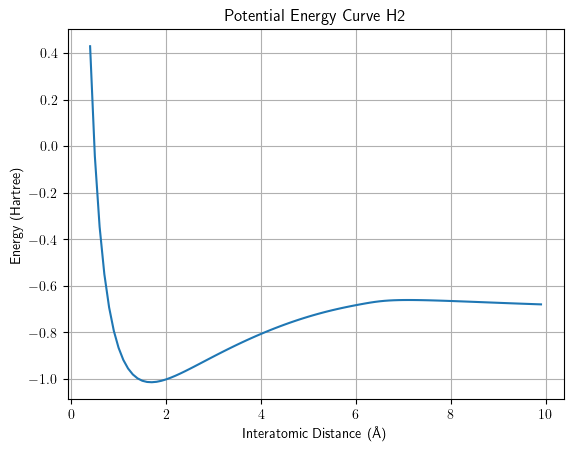

In [219]:
N = 2 
Nover2 = int(N/2)
N_nuclei = 2  
z_nuclei = np.array([1, 1])  
R_nuclei = np.zeros((N_nuclei,3))

K = 2 
L = 4 

widths = np.zeros((L, K))
contraction_coeffs = np.zeros((L, K)) 
centers = np.zeros((L, K, 3)) 

alpha1s_STO4G = np.array([8.021420155, 1.467821061, 0.4077767635, 0.1353374420]) 
d1s_STO4G = np.array([0.05675242080, 0.2601413550, 0.5328461143, 0.2916254405])

zeta_H = 1.24
widths[:,0] = alpha1s_STO4G
widths[:,1] = alpha1s_STO4G
contraction_coeffs[:,0] = d1s_STO4G
contraction_coeffs[:,1] = d1s_STO4G

bond_dists = np.arange(0.4, 10, 0.1)
E_totals = []

for bond_dist in tqdm(bond_dists):
    R_nuclei[1, 0] = bond_dist
    
    centers = np.zeros((L,K,3))
    centers[0,1,:] = R_nuclei[1]
    centers[1,1,:] = R_nuclei[1]
    centers[2,1,:] = R_nuclei[1]
    
    S, T, U1, U2 = get_Hamiltonian_matrices(widths, contraction_coeffs, R_nuclei, z_nuclei, centers)
    E_elec, E, c, P = SCF_procedure(N, S, T, U1, U2, maxiter=15, to_print=False)
    E_nuc = get_E_nuc(R_nuclei, z_nuclei)
    E_total = E_elec + E_nuc
    E_totals.append(E_total)

fig, ax = plt.subplots()
ax.plot(bond_dists, E_totals)
ax.set_xlabel(r'Interatomic Distance (\AA)')
ax.set_ylabel(r'Energy (Hartree)')
ax.set_title('Potential Energy Curve H2')
ax.grid(True)
plt.savefig('Visualizations/project_2/p2_p3.png')

In [127]:
print(f'Equillibrium Distance: {bond_dists[E_totals.index(min(E_totals))]} Å')
print(f'Equillibrium Bond Energy: {min(E_totals)} Hartree')
print(f'Dissosiation Energy: {max(E_totals[10:]) - min(E_totals[10:])} Hartree')

Equillibrium Distance: 1.6999999999999997 Å
Equillibrium Bond Energy: -1.014369975126553 Hartree
Dissosiation Energy: 0.35340325344877277 Hartree


# Project 2 Part 4

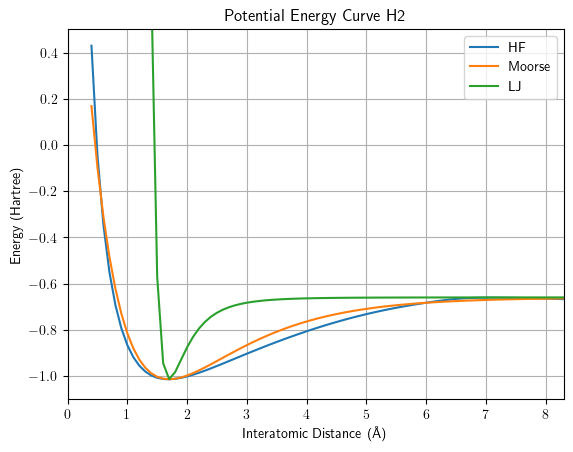

In [140]:
Be = 1.014369975126553 # Dissosiation energy (well depth for RHF)
De = 0.35340325344877277
r_eq = 1.6999999999999997 # equillibrium bond dists from RHF

a = 0.8 # exponent for Moorse potential
sigma = r_eq / 2**(1/6) # equillibrium interparticle distance for LJ potential
lj_shift = 0.66 

fig, ax = plt.subplots()
ax.plot(bond_dists, E_totals, label='HF')
ax.plot(bond_dists, De * (1 - np.exp(-1 * a * (bond_dists - r_eq)))**2 - Be, label='Moorse')
ax.plot(bond_dists, 4 * De * ((sigma / bond_dists)**12 - (sigma / bond_dists)**6) - lj_shift, label='LJ')
ax.legend()

ax.set_xlim(0, 8.3)
ax.set_ylim(-1.1, 0.5)
ax.set_xlabel(r'Interatomic Distance (\AA)')
ax.set_ylabel(r'Energy (Hartree)')
ax.set_title('Potential Energy Curve H2')
ax.grid(True)
plt.savefig('Visualizations/project_2/p2_p4.png')

The Moorse Potential and LJ potentials have the correct energy dissociation behaviors, which RHF cannot reproduce due to the lack of spin characterization of the spacial orbitals. With the adjusted parameters from the HF calculation, the Moorse Potential fits well. However, the LJ-potential decays much rapidly, which is expected from the $r^{-6}$ decay. For the LJ-Potential, an arbitrary shift parameter had to be fit to match the bottom of the well to the bonding energy minima. 

One possible way to improve the potential is to add additional hyperparameters and try to fit to the Hartree Fock potential energy curve. 

# Project 3

# Project 3 Part 1

The Ensemble energy can be derived from path integral formulation of the quantum partition function: 

$$ Z = \int_{x(0)=x}^{x(\beta\hbar)=x} D(x(\tau))e^{-S(x(\tau))}, \text{ where } \quad S = \beta \sum_{n=0}^{k-1} \left[ \frac{mk(x_n - x_{n+1})^2}{2\beta^2 \hbar^2} + \frac{V(x_n)}{k} \right] \quad \text{and}  \quad \int D(x(\tau)) = \lim_{k\to\infty} \left(\frac{km}{2\pi\beta\hbar^2}\right)^{kd/2} \prod_{n=0}^{k-1}\int dx_n$$

$$\langle E \rangle = - \frac{\partial}{\partial \beta} \ln [Z] = \frac{kd}{2\beta} - \sum_{n=0}^{k-1} \left[ \frac{mk(x_n - x_{n+1})}{2\beta^2 \hbar^2} - \frac{V(x_n)}{k} \right]$$

This can be approximated with the Virial Estimator: 

$$\langle E \rangle = \frac{1}{k} \sum_{n=0}^{k-1} \left[ \langle V(x_n) \rangle + \frac{1}{2} \left\langle x_n \frac{d}{dx_n}[V(x_n)] \right\rangle \right]$$

Substituting the Morse Potential into the Virial Estimator form:

$$V(r) = D_e(1 - e^{-\alpha (r - r_{eq})})^2 - D_e$$

$$\frac{\partial V(r)}{\partial r_{eq}} = 2aD_e e^{-a(r-r_{eq})} \left( 1-e^{-a(r-r_{eq})} \right)$$

$$\langle E \rangle = \frac{1}{k} \sum_{n=0}^{k-1} \left[ \langle \left( D_e(1 - e^{-\alpha (r_n - r_{eq})})^2 - D_e \right) \rangle + \frac{1}{2} \left\langle r_n 2aD_e e^{-a(r_n-r_{eq})} \left( 1-e^{-a(r_n-r_{eq})} \right) \right\rangle \right]$$

$$\langle E \rangle = \frac{1}{k} \sum_{n=0}^{k-1} \left[ D_e \left( 1-e^{-a(r_n-r_{eq})} \right)^2 - D_e + aD_e r_n e^{-a(r_n-r_{eq})} \left( 1-e^{-a(r_n-r_{eq})} \right) \right]$$

# Project 3 Part 2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4281.93it/s]


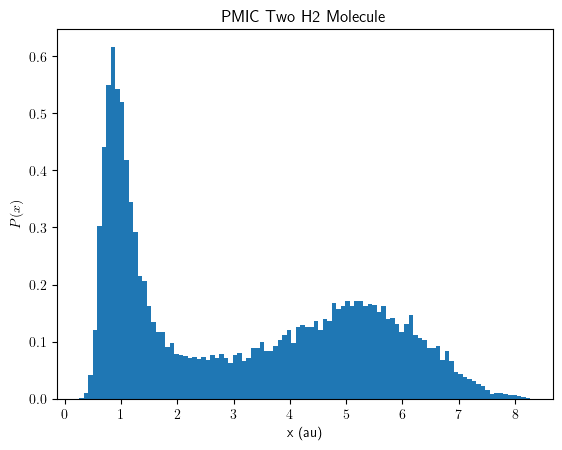

In [220]:
import numba, sys
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

@numba.jit(nopython=True) # random position initialization
def initialize(r1, r2, L):
    for i in range(N):
        r1[i, 0] = 0.3 * L * np.random.rand()
        r1[i, 1] = 0.3 * L * np.random.rand()
        r1[i, 2] = 0.3 * L * np.random.rand()
        
        r2[i, 0] = 0.6 * L + 0.3 * L * np.random.rand()
        r2[i, 1] = 0.6 * L + 0.3 * L * np.random.rand()
        r2[i, 2] = 0.6 * L + 0.3 * L * np.random.rand()
    return r1, r2

@numba.jit(nopython=True)
def minimum_image(dr, L):
    dr -= L * np.round(dr / L)
    return dr

@numba.jit(nopython=True)
def wrap(r, L):
    return r - L * np.floor(r / L)

@numba.jit(nopython=True)
def Morse(dist, De, a, r_eq):
    return De * (1 - np.exp(-a * (dist - r_eq)))**2 - De

@numba.jit(nopython=True)
def calculate_distance(r1, r2, L):
    dx = minimum_image(r1[0] - r2[0], L)
    dy = minimum_image(r1[1] - r2[1], L)
    dz = minimum_image(r1[2] - r2[2], L)
    return np.sqrt(dx*dx + dy*dy + dz*dz)

@numba.jit(nopython=True)
def MetropolisB(r1,r1n0,r1n1,r2,n,N,kBT):
    KEi=(np.sum(minimum_image(r1[(n+1)%N]-r1n0, L)))**2.+(np.sum(minimum_image(r2[(n+1)%N]-r2[n], L)))**2.
    KEi=m*KEi*N*kBT**2/2.
    PEi=Morse(calculate_distance(r1n0, r2[n], L), De, a, r_eq)/N

    KEf=(np.sum(minimum_image(r1[(n+1)%N]-r1n1, L)))**2.+(np.sum(minimum_image(r2[(n+1)%N]-r2[n], L)))**2.
    KEf=m*KEf*N*kBT**2/2.
    PEf=Morse(calculate_distance(r1n1, r2[n], L), De, a, r_eq)/N

    return PEf+KEf-PEi-KEi

@numba.jit(nopython=True)
def Monte_Carlo(r1, r2, kBT, count, L, De, a, r_eq): 
    delta = 0.82 
    for step in range(2*N+1):
        index = np.random.randint(0, 2*N) 

        if index < N:
            r1_old = r1[index]
            r1_new = r1[index] + 2*delta*(np.random.rand(3)-0.5)

            action = MetropolisB(r1, r1_old, r1_new, r2, index, N, kBT) / kBT
            if np.random.random()<=np.exp(-action):
                r1[index] = wrap(r1_new, L)
                count+=1
        else:
            index = index - N
            
            r2_old = r2[index]
            r2_new = r2[index] + 2*delta*(np.random.rand(3)-0.5)

            action = MetropolisB(r2, r2_old, r2_new, r1, index, N, kBT) / kBT
            if np.random.random()<=np.exp(-action):
                r2[index] = wrap(r2_new, L)
                count+=1
    return r1, r2, count

N = 100
L = 10.0
m = 1.0 
De = 4.7446
a = 1.440558
r_eq = 0.7416

steps = 100000
Nsamp = 500 
kBT = (3.167*10**(-6))*2000.0
hbar = 1

r1 = np.zeros([N, 3]) 
r2 = np.zeros([N, 3]) 
r1, r2 = initialize(r1, r2, L) 

distances = []
Es = []
count = 0

for step in tqdm(range(steps)): 
    r1, r2, count = Monte_Carlo(r1, r2, kBT, count, L, De, a, r_eq)
    
    if(step%Nsamp==0 and step>0): # Every Nsamp steps, compute expectations
        for i in range(N):
            distances.append(calculate_distance(r2[i], r1[i], L))


fig, ax = plt.subplots()
ax.hist(distances[200:],histtype="bar",density=True, bins=100)
ax.set_xlabel("x (au)")
ax.set_ylabel(r"$P(x)$")
ax.set_title('PMIC Two H2 Molecule')
plt.savefig('Visualizations/project_3/p3_p2.png')

# Project 3 Part 3

Translatin the whole ring polymer keeps springs between the beads unchanged, therefore the kinetic energy remains the same. The difference in energy comes from the displaced position in the potenteial term: 

$$ \Delta E =  \frac{1}{k} \sum_{n=0}^{k-1} \left[V(r_n + \delta r_n) - V(r_n)k \right]$$

$$\text{where} \quad r_n = e_n - h_n$$

The energy difference is then substituted into the Metropolis condition:  

$$ e^{-\beta \Delta E} = e^{-\beta \frac{1}{k} \sum_{n=0}^{k-1} \left[V(r_n + \delta r_n) - V(r_n)k \right]} $$

In [221]:
@numba.jit(nopython=True)
def Monte_Carlo_shift(r1, r2, kBT, count, L, De, a, r_eq): 
    delta = 0.82 
    for step in range(2*N+2):
        index = np.random.randint(0, 2*N) 

        if index < N:
            r1_old = r1[index]
            r1_new = r1[index] + 2*delta*(np.random.rand(3)-0.5)

            action = MetropolisB(r1, r1_old, r1_new, r2, index, N, kBT) / kBT
            if np.random.random()<=np.exp(-action):
                r1[index] = wrap(r1_new, L)
                count+=1
        elif index >= N and index < 2*N:
            index = index - N
            
            r2_old = r2[index]
            r2_new = r2[index] + 2*delta*(np.random.rand(3)-0.5)

            action = MetropolisB(r2, r2_old, r2_new, r1, index, N, kBT) / kBT
            if np.random.random()<=np.exp(-action):
                r2[index] = wrap(r2_new, L)
                count+=1
        elif index == 2*N: # move entire ring 1
            shift = 2 * delta * (np.random.rand(3) - 0.5)
            r1_shift = r1 + shift
            r1_shift = wrap(r1_shift, L)
            U_shift = 0
            for n in range(N):
                r1_dist_old = calculate_distance(r1[n], r2[n], L)
                r1_dist_new = calculate_distance(r1_shift[n], r2[n], L)
                U_shift += Morse(r1_dist_new, De, a, r_eq) - Morse(r1_dist_old, De, a, r_eq)
            U_shift = U_shift / (N*kBT)
            if np.random.random()<=np.exp(-U_shift):
                r1[:] = r1_new
                count+=1
        else: # move entire ring 2
            shift = 2 * delta * (np.random.rand(3) - 0.5)
            r2_shift = r2 + shift
            r2_shift = wrap(r2_shift, L)
            U_shift = 0
            for n in range(N):
                r2_dist_old = calculate_distance(r2[n], r1[n], L)
                r2_dist_new = calculate_distance(r2_shift[n], r1[n], L)
                U_shift += Morse(r2_dist_new, De, a, r_eq) - Morse(r2_dist_old, De, a, r_eq)
            U_shift = U_shift / (N*kBT)
            if np.random.random()<=np.exp(-U_shift):
                r2[:] = r2_new
                count+=1
    return r1, r2, count

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4271.19it/s]


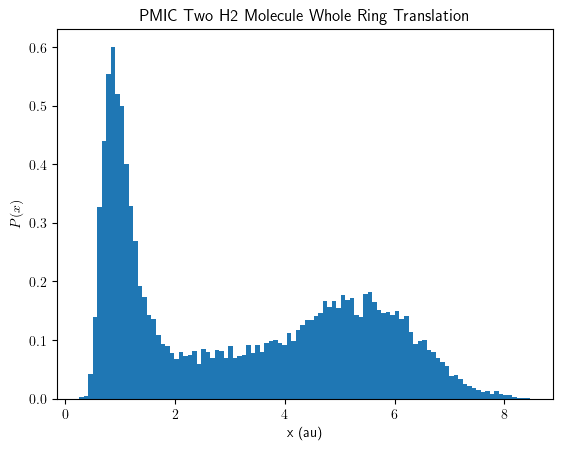

In [222]:
N = 100
L = 10.0
m = 1.0 
De = 4.7446
a = 1.440558
r_eq = 0.7416

steps = 100000
Nsamp = 500 
kBT = (3.167*10**(-6))*2000.0
hbar = 1

r1 = np.zeros([N, 3]) 
r2 = np.zeros([N, 3]) 
r1, r2 = initialize(r1, r2, L) 

distances = []
Es = []
count = 0

for step in tqdm(range(steps)): 
    r1, r2, count = Monte_Carlo_shift(r1, r2, kBT, count, L, De, a, r_eq)
    
    if(step%Nsamp==0 and step>0): # Every Nsamp steps, compute expectations
        for i in range(N):
            distances.append(calculate_distance(r2[i], r1[i], L))


fig, ax = plt.subplots()
ax.hist(distances[200:],histtype="bar",density=True, bins=100)
ax.set_xlabel("x (au)")
ax.set_ylabel(r"$P(x)$")
ax.set_title('PMIC Two H2 Molecule Whole Ring Translation')
plt.savefig('Visualizations/project_3/p3_p3.png')

# Project 3 Part 4

In [93]:
@numba.jit(nopython=True)
def virial(r1, r2, De, a, r_eq, N):
    E = 0.0
    for n in range(N):
        dr = calculate_distance(r1[n], r2[n], L)
        term1 = De * (1 - np.exp(-a * (dr - r_eq)))**2
        term2 = De + a*De*dr*np.exp(-a * (dr - r_eq))*(1 - np.exp(-a * (dr - r_eq)))
        E += term1 - term2
    return E / N

## 1000 K

In [101]:
N = 100
L = 10.0
m = 1.0 
De = 4.7446
a = 1.440558
r_eq = 0.7416

steps = 100000
Nsamp = 500 
kBT = (3.167*10**(-6))*1000.0
hbar = 1

r1 = np.zeros([N, 3]) 
r2 = np.zeros([N, 3]) 
r1, r2 = initialize(r1, r2, L) 

distances = []
Es = []
count = 0

for step in tqdm(range(steps)): 
    r1, r2, count = Monte_Carlo_shift(r1, r2, kBT, count, L, De, a, r_eq)
    
    if(step%Nsamp==0 and step>0): # Every Nsamp steps, compute expectations
        Es.append(virial(r1, r2, De, a, r_eq, N))
        for i in range(N):
            distances.append(calculate_distance(r2[i], r1[i], L))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:22<00:00, 4390.50it/s]


Virial Estimator Energy: -4.923008678736133 +/- 0.09299213115055376


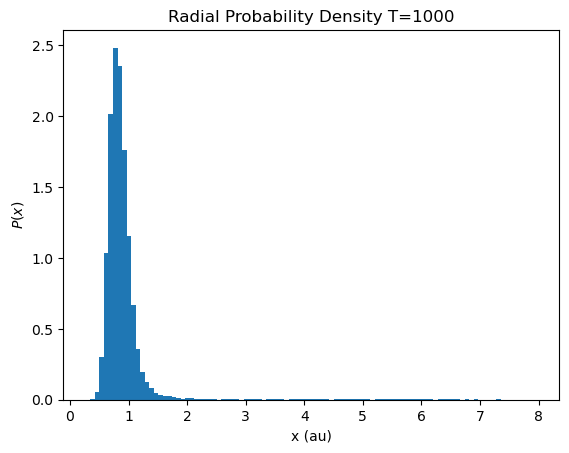

In [102]:
print(f'Virial Estimator Energy: {np.mean(Es)} +/- {np.std(Es)}')

fig, ax = plt.subplots()
ax.hist(distances[200:],histtype="bar",density=True, bins=100)
ax.set_xlabel("x (au)")
ax.set_ylabel(r"$P(x)$")
ax.set_title('Radial Probability Density T=1000')
plt.savefig('Visualizations/project_3/p3_p4.png')

## T = 2000

In [105]:
N = 100
L = 10.0
m = 1.0 
De = 4.7446
a = 1.440558
r_eq = 0.7416

steps = 100000
Nsamp = 500 
kBT = (3.167*10**(-6))*2000.0
hbar = 1

r1 = np.zeros([N, 3]) 
r2 = np.zeros([N, 3]) 
r1, r2 = initialize(r1, r2, L) 

distances = []
Es = []
count = 0

for step in tqdm(range(steps)): 
    r1, r2, count = Monte_Carlo_shift(r1, r2, kBT, count, L, De, a, r_eq)
    
    if(step%Nsamp==0 and step>0):
        Es.append(virial(r1, r2, De, a, r_eq, N))
        for i in range(N):
            distances.append(calculate_distance(r2[i], r1[i], L))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4313.25it/s]


Virial Estimator Energy: -2.3682754221264912 +/- 0.3004361114166225


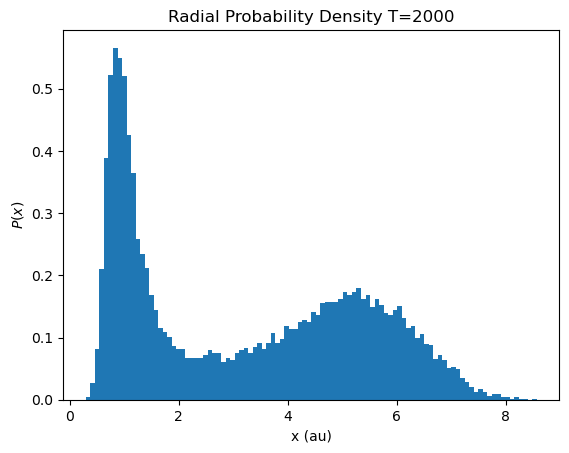

In [106]:
print(f'Virial Estimator Energy: {np.mean(Es)} +/- {np.std(Es)}')

fig, ax = plt.subplots()
ax.hist(distances[200:],histtype="bar",density=True, bins=100)
ax.set_xlabel("x (au)")
ax.set_ylabel(r"$P(x)$")
ax.set_title('Radial Probability Density T=2000')
plt.savefig('Visualizations/project_3/p3_p4_1.png')

As temperature increases, the distribution spreads to higher H-H distances, which is expected form the Maxwell-Boltzmann Distribution. 

# Project 4

# Project 4 Part 1 - Part 3

In [1]:
import matplotlib.pyplot as plt

class histogram(): 
    def __init__(self,limits,binwidth): 
        self.limits = limits
        self.binwidth = binwidth
        self.vals = np.arange(self.limits[0] + self.binwidth / 2, self.limits[1], self.binwidth) 
        self.histo = 0 * self.vals 
        self.N_samples = 0
        self.mean = 0
        self.mean_square = 0
        self.std_dev = 0
        self.err_of_mean = 0
        self.histo_err = 0

    def add_sample(self,dat): 
        self.N_samples += 1
        if dat > self.limits[0] and dat < self.limits[1]:
            bin_index = int((dat - self.limits[0]) / self.binwidth) 
            self.histo[bin_index] += 1 

    def normalize(self): # normalize data into density plot
        self.histo = self.histo / (self.N_samples * self.binwidth)

    def barplot(self, ax): # plot bar plot with matplotlib
        ax.bar(self.vals, self.histo, width=0.95 * self.binwidth, color='k')

    def compute_mean(self):
        self.mean = np.sum(self.vals * self.histo * self.binwidth)

    def compute_mean_square(self):
        self.mean_square = np.sum((self.vals ** 2) * self.histo * self.binwidth)

    def compute_std_dev(self):
        self.compute_mean()
        self.compute_mean_square()
        self.std_dev = np.sqrt(self.mean_square - (self.mean ** 2))

    def compute_error_of_mean(self):
        self.compute_std_dev()
        self.err_of_mean = np.sqrt(self.std_dev / self.N_samples)

    def compute_histogram_error(self): 
        self.histo_err = np.sqrt(self.histo * (1 - self.histo * self.binwidth) / (self.N_samples * self.binwidth))

    def plot_error_bars(self, ax):
        self.compute_histogram_error()
        ax.errorbar(self.vals, self.histo, 2 * self.histo_err, fmt='None', capsize=3)
        
    def lineplot(self, ax):
        ax.plot(self.vals, self.histo)

In [145]:
import numpy as np
from tqdm import tqdm
from numba import jit
import matplotlib.pyplot as plt

def init_config(N):
    r = np.zeros((N, 3))
    n_side = int(N ** (1/3) + 0.99)
    count = 0
    for x in range(n_side):
        for y in range(n_side):
            for z in range(n_side): 
                if count < N:
                    r[count, :] = [x, y, z]
                    count += 1
    return r

@jit(nopython=True)
def compute_forces_and_potential(N, r, box_length, r_cut_squared): 
    forces = np.zeros((N, 3)) 
    potential = 0.0
    for i in range(N):
        for j in range(i+1, N): 
            dr = r[i,:] - r[j,:]
            dr -= box_length * np.floor(dr / box_length + 0.5)
            dr2 = dr @ dr

            if dr2 < r_cut_squared:
                # force_factor = 48 * (dr2**(-7) - 0.5 * dr2**(-4)) - 4 * (r_cut_squared**(-7) - r_cut_squared**(-4))
                force_factor = 48 * (dr2**(-7) - 0.5 * dr2**(-4)) 
                forces[i,:] += force_factor * dr 
                forces[j,:] -= force_factor * dr 
                potential += 4 * (dr2**(-6) - dr2**(-3)) - 4 * (r_cut_squared**(-6) - r_cut_squared**(-3)) # sigma = 1, epsilon = 1
    return forces, potential

@jit(nopython=True)
def metropolis(v, N, k_coll, delta_t, T):
    for i in range(N):
        if np.random.rand() < k_coll * delta_t:
            for d in range(3):
                v[i, d] = np.random.normal(0, np.sqrt(T)) # m = 1
    return v

@jit(nopython=True)
def velocity_verlet(v, r, forces, potential_energy, delta_t, N, box_length, r_cut_squared):
    v = v + 0.5 * delta_t * forces 
    r = r + delta_t * v 
    forces, potential_energy = compute_forces_and_potential(N, r, box_length, r_cut_squared) 
    v = v + 0.5 * delta_t * forces 
    kinetic_energy = 0.5 * np.sum( v**2 )
    return v, r, forces, potential_energy, kinetic_energy

In [6]:
N = 256
delta_t = 0.001
total_time = 10
N_steps = int(total_time/delta_t) 
T = 1.5
k_coll = 1

density = 0.6
box_length = (N / density) ** (1/3) 
r_cut = min(box_length/2, 3.0)
r_cut_squared = r_cut**2

kinetic_traj = []
potential_traj = []

r = init_config(N)
v = np.zeros((N,3))
forces, potential_energy = compute_forces_and_potential(N, r, box_length, r_cut_squared)

for step in tqdm(range(N_steps)):
    v, r, forces, potential_energy, kinetic_energy = velocity_verlet(v, r, forces, potential_energy, delta_t, N, box_length, r_cut_squared)
    
    kinetic_traj.append(kinetic_energy)
    potential_traj.append(potential_energy)

    v = metropolis(v, N, k_coll=k_coll, delta_t=delta_t, T=T)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:36<00:00, 275.75it/s]


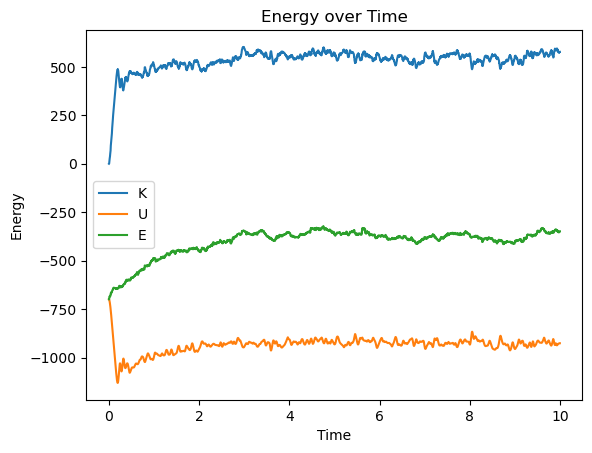

In [7]:
fig, ax = plt.subplots()
time_traj = np.arange(N_steps)*delta_t
ax.plot(time_traj, kinetic_traj, label='K')
ax.plot(time_traj, potential_traj, label='U')
ax.plot(time_traj, np.array(kinetic_traj) + np.array(potential_traj), label='E')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Energy')
ax.set_title('Energy over Time')
plt.savefig('Visualizations/project_4/p4_p1_3.png')

# Project 4 - Part 4 

In [147]:
import numpy as np
from tqdm import tqdm
from numba import jit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def init_FCC(N, box_length):
    basis = np.array([
        [0, 0, 0],
        [0.5, 0.5, 0],
        [0.5, 0, 0.5],
        [0, 0.5, 0.5]
    ])

    n_cells = int(np.ceil((N / 4) ** (1/3)))
    a = box_length / n_cells 
    r = np.zeros((N, 3))
    counter = 0

    for i in range(n_cells):
        for j in range(n_cells):
            for k in range(n_cells):
                for b in basis:
                    pos = (np.array([i, j, k]) + b) * a
                    r[counter] = pos
                    counter += 1

    return np.array(r)


def init_config(N, box_length, scaling=1.0):
    r = np.zeros((N, 3))
    n_side = int(N ** (1/3) + 0.99)
    a = box_length / n_side 
    count = 0
    for x in range(n_side):
        for y in range(n_side):
            for z in range(n_side): 
                if count < N:
                    r[count, :] = np.array([x, y, z]) * a * scaling
                    count += 1
    return r

def plot_circle(ax, center, radius):
    npoints = 100
    theta = np.arange(0,2*np.pi + 1e-7,2*np.pi/npoints)
    x = center[0] + radius*np.cos(theta)
    y = center[1] + radius*np.sin(theta)
    ax.plot(x, y, 'k', linewidth=2)


def draw_config(r, box_length, slice_width=0.5, z_slice=None):
    if z_slice is None:
        z_slice = box_length / 2.0

    mask = abs(r[:, 2] - z_slice) < slice_width / 2
    r_slice = r[mask]

    fig, ax = plt.subplots()
    for i in range(len(r_slice)):
        plot_circle(ax, r_slice[i], radius=0.5)

    ax.set_aspect('equal')
    ax.set_adjustable("box")
    ax.set_xlim(0, box_length)
    ax.set_ylim(0, box_length)
    ax.set_title(f"Plot z = {z_slice:.2f} ± {slice_width/2:.2f}")


def draw_config_3d(r, box_length, title, dir, point_size=50):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(r[:, 0], r[:, 1], r[:, 2], s=point_size, alpha=0.6, edgecolors='k')
    
    ax.set_xlim(0, box_length)
    ax.set_ylim(0, box_length)
    ax.set_zlim(0, box_length)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    
    ax.view_init(elev=30, azim=45)
    plt.savefig(dir)

## FCC Initialized Simulations

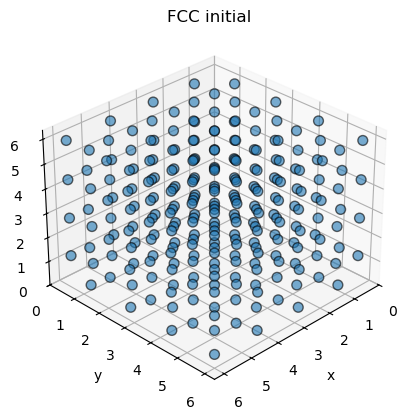

In [15]:
N = 256
delta_t = 0.001
total_time = 20
N_steps = int(total_time/delta_t) 
Ts = [0.6, 0.7, 0.8, 0.8, 0.9, 0.9]
k_coll = 1

densitys = [1.0, 1.0, 0.9, 0.9, 0.9, 0.8]
box_lengths = [(N / density) ** (1/3) for density in densitys]
r_cuts = [min(box_length/2, 3.0) for box_length in box_lengths]
r_cut_squareds = [r_cut**2 for r_cut in r_cuts]

r = init_FCC(N, box_lengths[0])
v = np.zeros((N,3))

# draw_config(r, box_lengths[0], slice_width=0.5, z_slice=0)
title = 'FCC initial'
dir = 'Visualizations/project_4/FCC/FCC_init.png'
draw_config_3d(r, box_lengths[0], title, dir)

In [16]:
FCC_Ks = []
FCC_Us = []
FCC_Es = []
FCC_g_rs = []
FCC_r_finals = []

for T, density, box_length, r_cut_squared in zip(Ts, densitys, box_lengths, r_cut_squareds):
    kinetic_traj = []
    potential_traj = []
    
    r = init_FCC(N, box_length)
    v = np.zeros((N,3))

    binwidth = 0.05
    g_r = histogram([0, 3.5], binwidth)
    Mconf = 0 
    
    forces, potential_energy = compute_forces_and_potential(N, r, box_length, r_cut_squared)
    
    for step in tqdm(range(N_steps)):
        v, r, forces, potential_energy, kinetic_energy = velocity_verlet(v, r, forces, potential_energy, delta_t, N, box_length, r_cut_squared)
        
        kinetic_traj.append(kinetic_energy)
        potential_traj.append(potential_energy)
    
        v = metropolis(v, N, k_coll=k_coll, delta_t=delta_t, T=T)

        if step >= 3000 and step % 10 == 0: # 17/0.001 = 20000 - 17000 = 3000 steps until equillibrium
            # g_r = radial_dist(N, box_length, g_r)
            for i in range(N):
                for j in range(i + 1, N):
                    dr_vec = r[i] - r[j]
                    dr_vec -= box_length * np.floor(dr_vec / box_length + 0.5)
                    distance = np.sqrt(np.dot(dr_vec, dr_vec))
                    if distance < 3.5:
                        g_r.add_sample(distance)
            Mconf += 1
    g_r.normalize()
    rho = N / (box_length**3)
    for i in range(len(g_r.vals)):
        r_i = g_r.vals[i]
        shell_volume = 4 * np.pi * (r_i**2) * g_r.binwidth
        g_r.histo[i] = g_r.histo[i] / (rho * shell_volume)
    
    FCC_Ks.append(kinetic_traj)
    FCC_Us.append(potential_traj)
    FCC_Es.append([k + p for k, p in zip(kinetic_traj, potential_traj)])
    FCC_g_rs.append(g_r)
    FCC_r_finals.append(r)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:28<00:00, 74.49it/s]


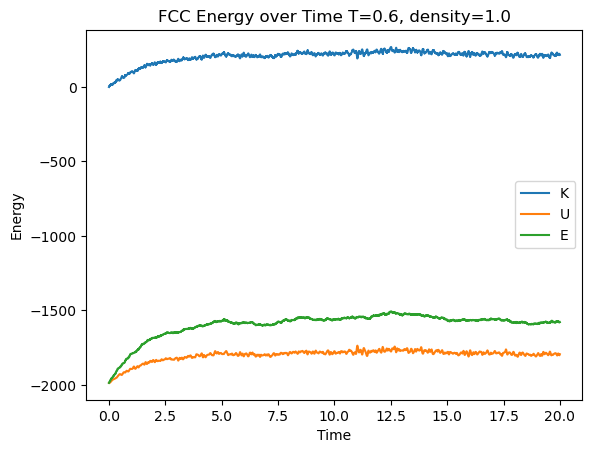

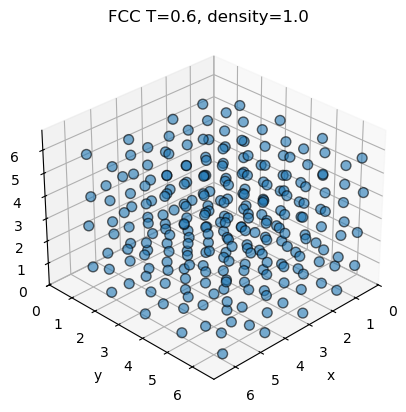

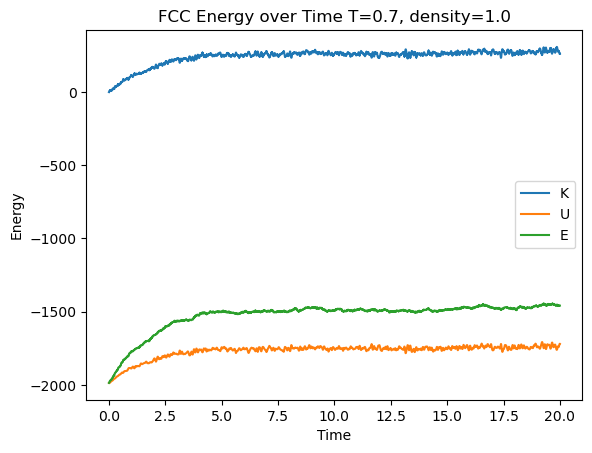

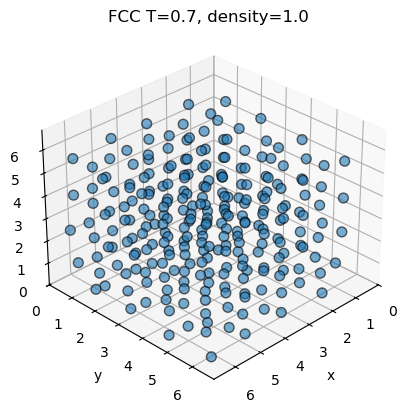

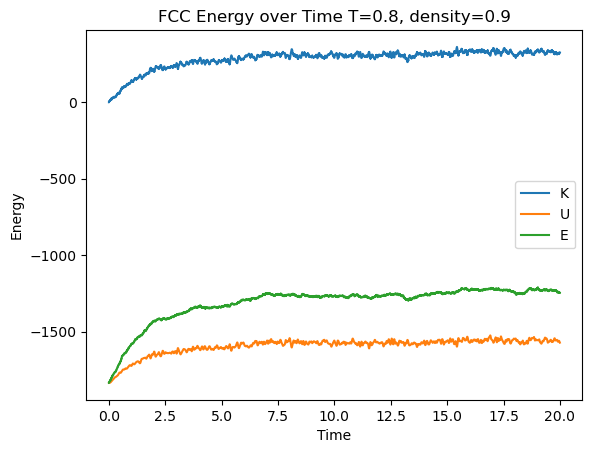

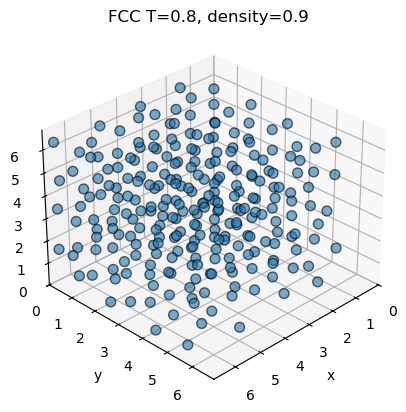

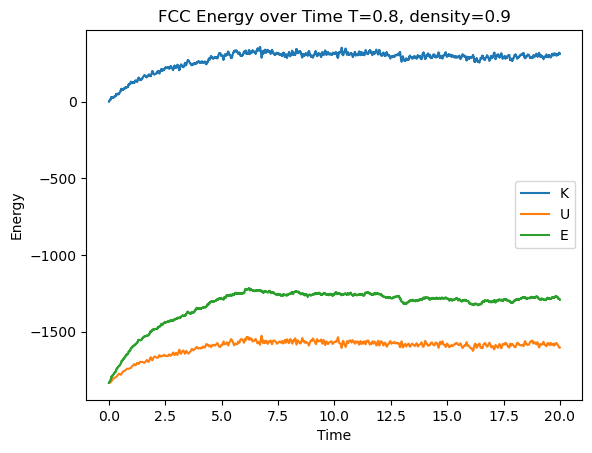

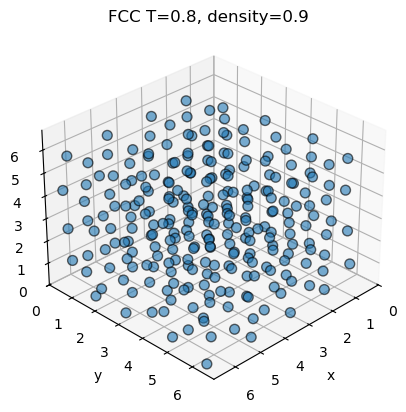

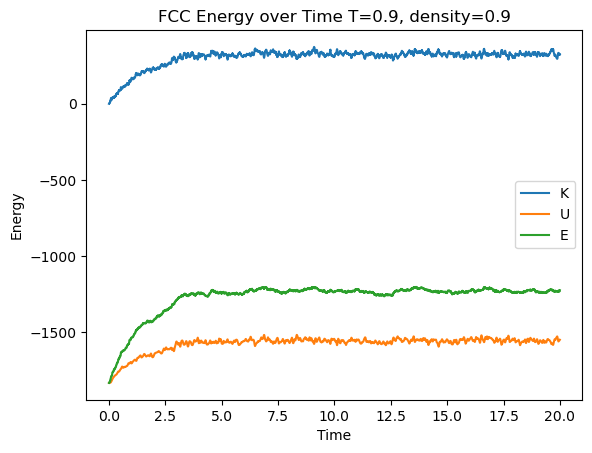

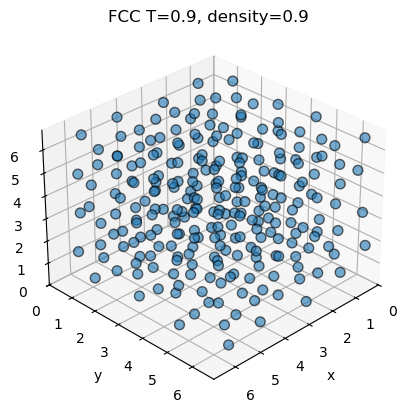

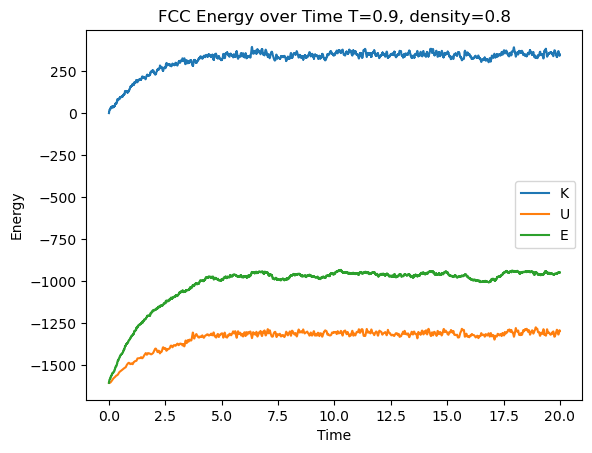

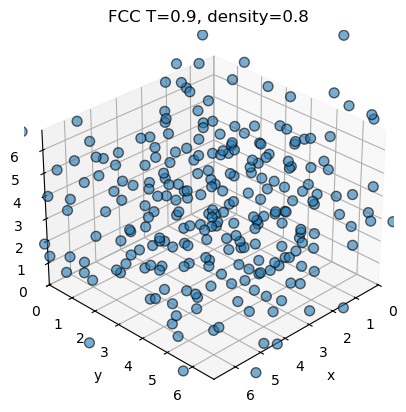

In [17]:
for K, U, E, r, T, d in zip(FCC_Ks, FCC_Us, FCC_Es, FCC_r_finals, Ts, densitys):
    fig, ax = plt.subplots()
    time_traj = np.arange(N_steps)*delta_t
    ax.plot(time_traj, K, label='K')
    ax.plot(time_traj, U, label='U')
    ax.plot(time_traj, E, label='E')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy')
    ax.set_title(f'FCC Energy over Time T={T}, density={d}')
    plt.savefig(f'Visualizations/project_4/FCC_1/FCC_{T}_{d}_E.png')
    # draw_config(r, box_length, slice_width=0.5, z_slice=0)
    title = f'FCC T={T}, density={d}'
    dir = f'Visualizations/project_4/FCC_1/FCC_{T}_{d}.png'
    draw_config_3d(r, box_length, title, dir)

## Liquid (distanced) Initialized Simulation

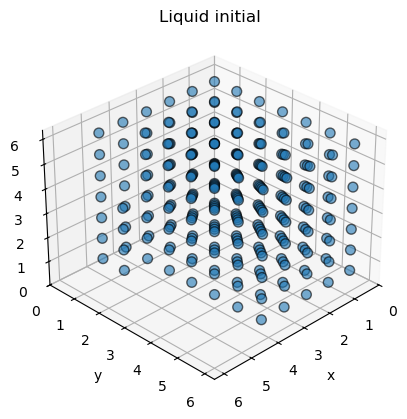

In [19]:
r = init_config(N, box_lengths[0], 0.97)
v = np.zeros((N,3))

# draw_config(r, box_lengths[0], slice_width=0.5, z_slice=0)
title = 'Liquid initial'
dir = 'Visualizations/project_4/liquid/liquid_init.png'
draw_config_3d(r, box_lengths[0], title, dir)

In [27]:
liquid_Ks = []
liquid_Us = []
liquid_Es = []
liquid_g_rs = []
liquid_r_finals = []
eq_steps = [7500, 7500, 7500, 7500, 7500, 5000]

for T, density, box_length, eq_step, r_cut_squared in zip(Ts, densitys, box_lengths, eq_steps, r_cut_squareds):
    kinetic_traj = []
    potential_traj = []

    scaling = 1.00 # most ideal result from manual tuning
    r = init_config(N, box_length, scaling)
    v = np.zeros((N,3))

    binwidth = 0.05
    g_r = histogram([0, 3.5], binwidth)
    Mconf = 0 
    
    forces, potential_energy = compute_forces_and_potential(N, r, box_length, r_cut_squared)
    
    for step in tqdm(range(N_steps)):
        v, r, forces, potential_energy, kinetic_energy = velocity_verlet(v, r, forces, potential_energy, delta_t, N, box_length, r_cut_squared)
        
        kinetic_traj.append(kinetic_energy)
        potential_traj.append(potential_energy)
    
        v = metropolis(v, N, k_coll=k_coll, delta_t=delta_t, T=T)

        if step >= eq_step and step % 10 == 0: # 17/0.001 = 20000 - 17000 = 3000 steps until equillibrium
            # g_r = radial_dist(N, box_length, g_r)
            for i in range(N):
                for j in range(i + 1, N):
                    dr_vec = r[i] - r[j]
                    dr_vec -= box_length * np.floor(dr_vec / box_length + 0.5)
                    distance = np.sqrt(np.dot(dr_vec, dr_vec))
                    if distance < 3.5:
                        g_r.add_sample(distance)
            Mconf += 1
            
    g_r.normalize()
    rho = N / (box_length**3)
    for i in range(len(g_r.vals)):
        r_i = g_r.vals[i]
        shell_volume = 4 * np.pi * (r_i**2) * g_r.binwidth
        g_r.histo[i] = g_r.histo[i] / (rho * shell_volume)
        
    liquid_Ks.append(kinetic_traj)
    liquid_Us.append(potential_traj)
    liquid_Es.append([k + p for k, p in zip(kinetic_traj, potential_traj)])
    liquid_g_rs.append(g_r)
    liquid_r_finals.append(r)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [04:01<00:00, 82.71it/s]


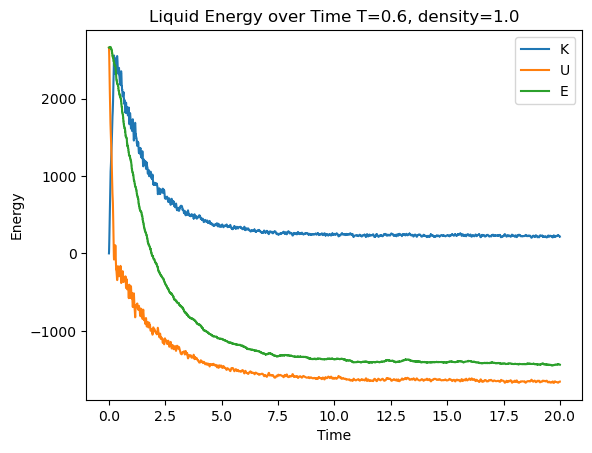

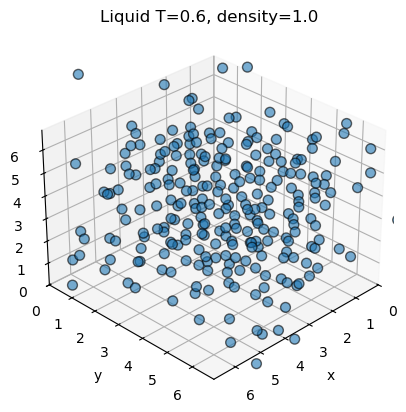

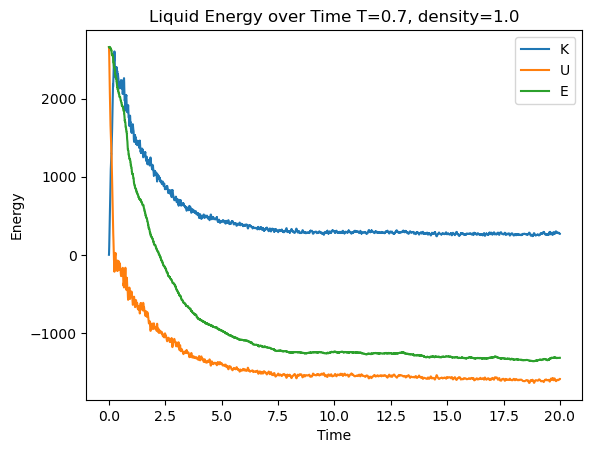

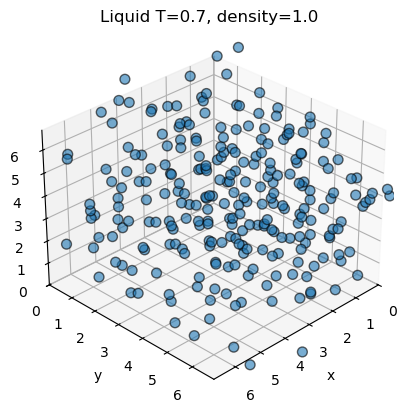

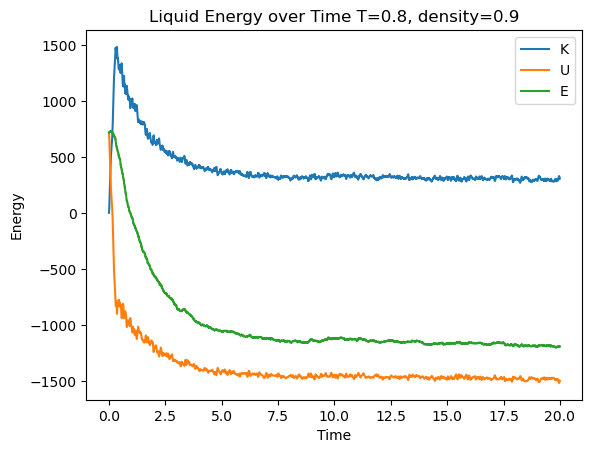

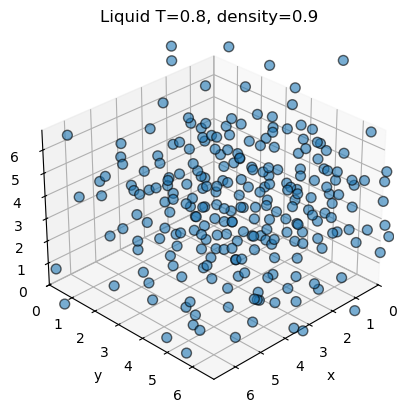

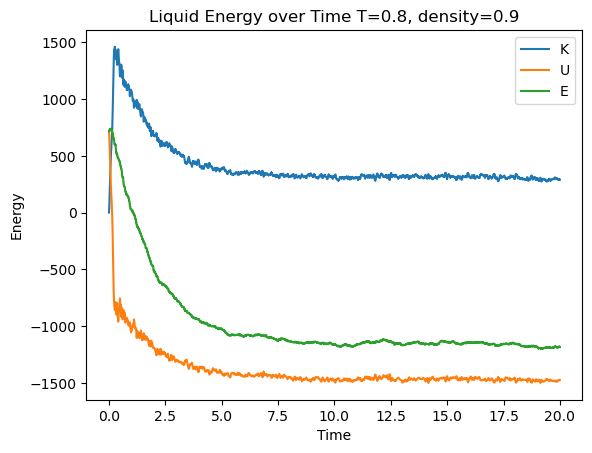

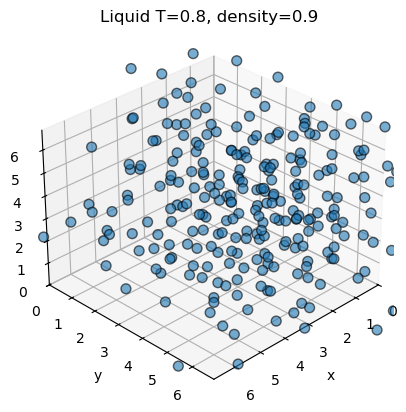

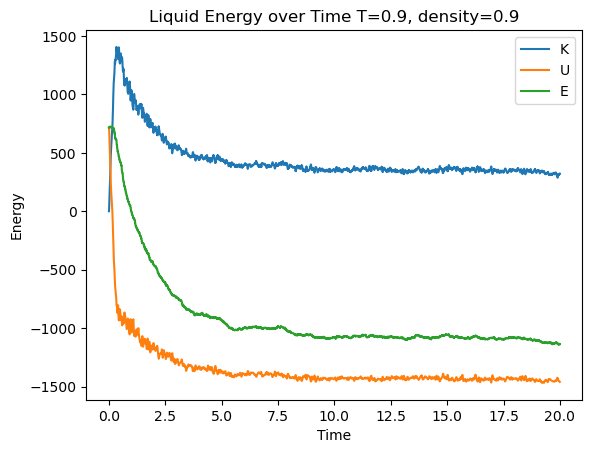

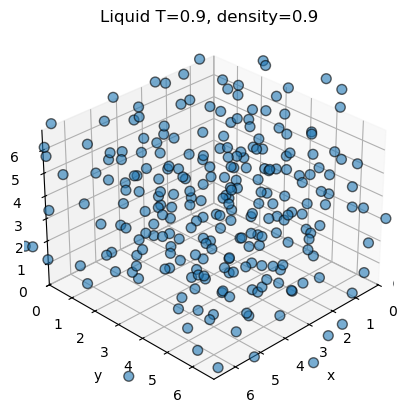

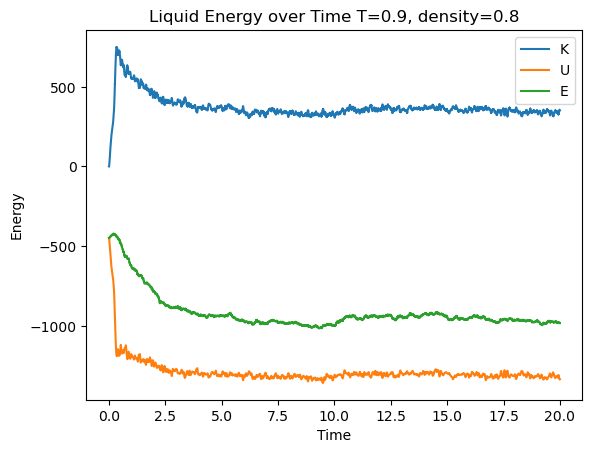

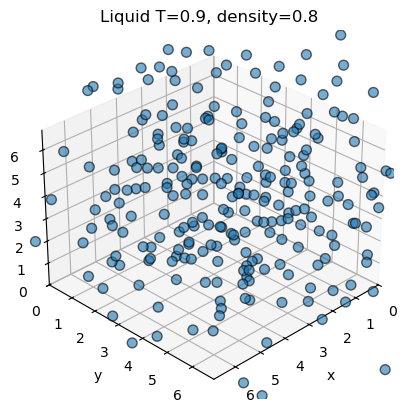

In [28]:
for K, U, E, r, T, d in zip(liquid_Ks, liquid_Us, liquid_Es, liquid_r_finals, Ts, densitys):
    fig, ax = plt.subplots()
    time_traj = np.arange(N_steps)*delta_t
    ax.plot(time_traj, K, label='K')
    ax.plot(time_traj, U, label='U')
    ax.plot(time_traj, E, label='E')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Energy')
    ax.set_title('Energy over Time')
    ax.set_title(f'Liquid Energy over Time T={T}, density={d}')
    plt.savefig(f'Visualizations/project_4/liquid/liquid_{T}_{d}_E.png')
    title = f'Liquid T={T}, density={d}'
    dir = f'Visualizations/project_4/liquid/liquid_{T}_{d}.png'
    draw_config_3d(r, box_length, title, dir)

| T* | $\rho \sigma^3$ | System state after $20 \tau$ simulation runs, starting from an initial FCC solid configuration | System state after $20 \tau$ simulation runs, starting from an initial liquid configuration |
| :--- | :--- | :--- | :--- |
| 0.6 | 1.0 | Solid | Semi-Liquid (almost Liquid) |
| 0.7 | 1.0 | Solid | Semi-Liquid (almost Liquid) |
| 0.8 | 0.9 | Semi-Solid | Liquid |
| 0.8 | 0.9 | Semi-Solid | Liquid |
| 0.9 | 0.9 | Semi-Liquid | Liquid |
| 0.9 | 0.8 | Liquid | Liquid |

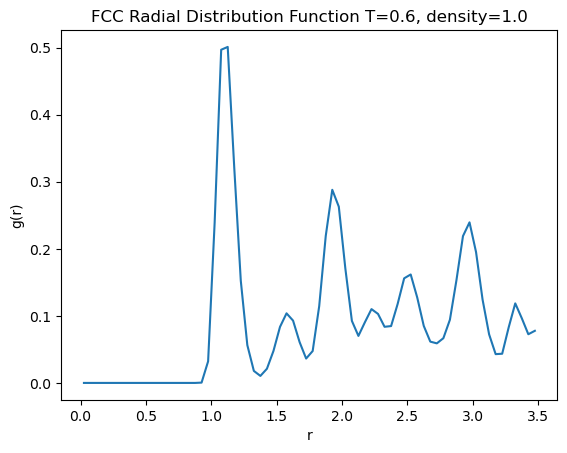

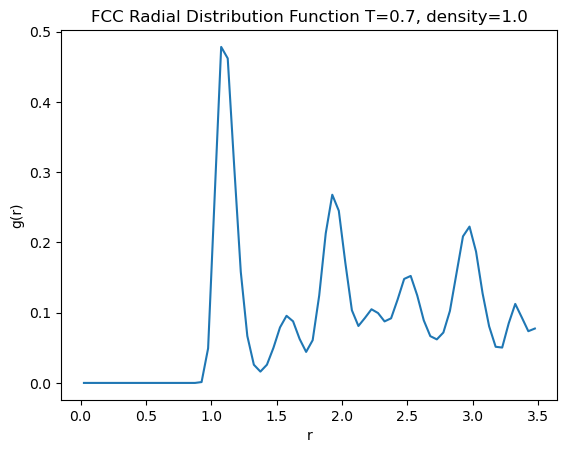

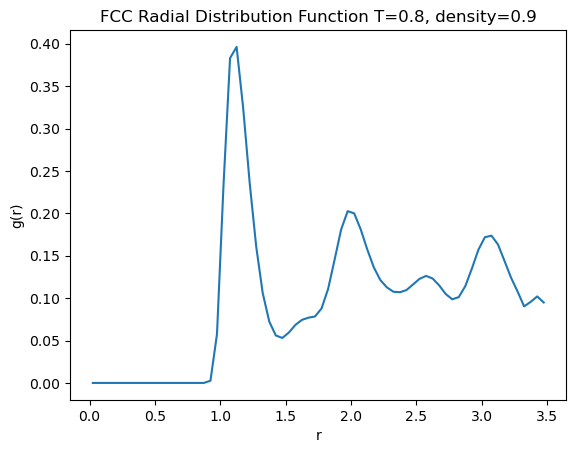

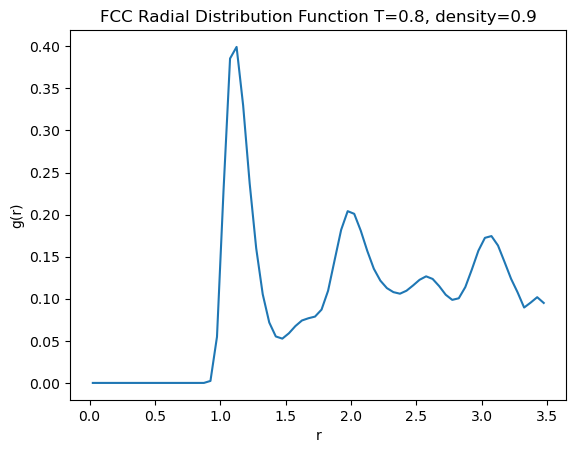

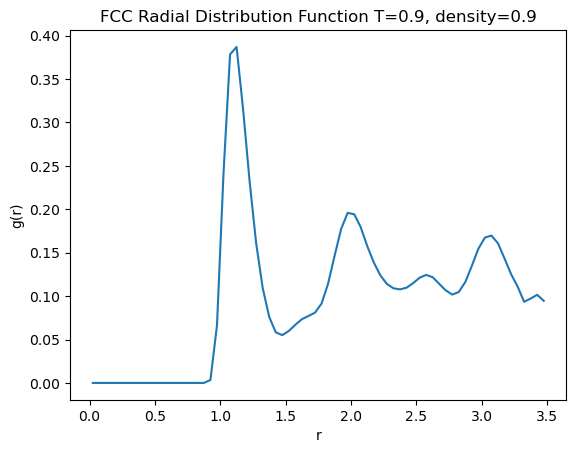

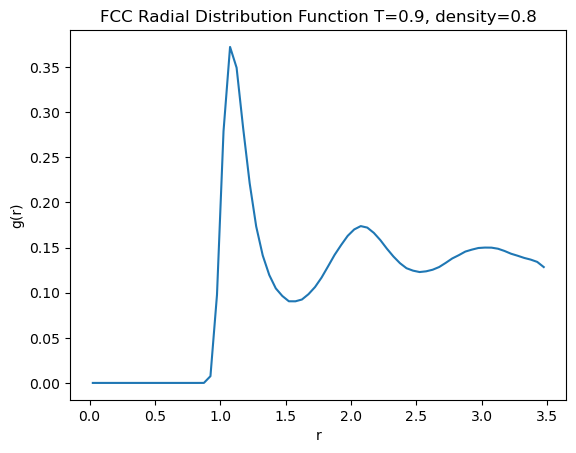

In [18]:
for g_r, T, d in zip(FCC_g_rs, Ts, densitys):
    # print(g_r.histo)
    fig, ax = plt.subplots()
    g_r.lineplot(ax)
    ax.set_xlabel('r')
    ax.set_ylabel('g(r)')
    ax.set_title(f'FCC Radial Distribution Function T={T}, density={d}')
    dir = f'Visualizations/project_4/FCC_1/FCC_{T}_{d}_g.png'
    plt.savefig(dir)

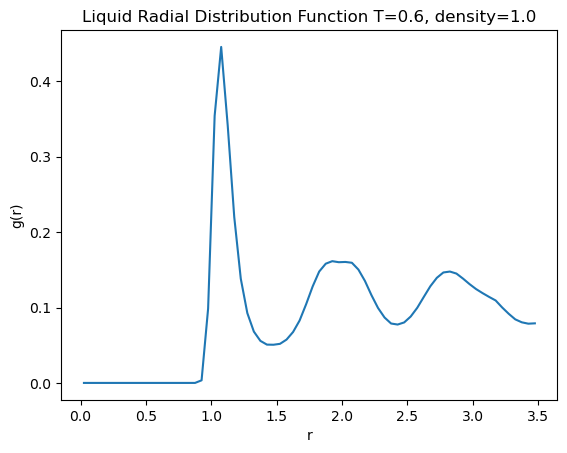

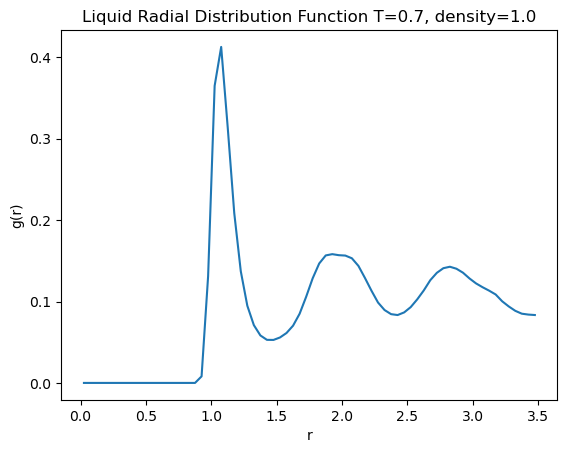

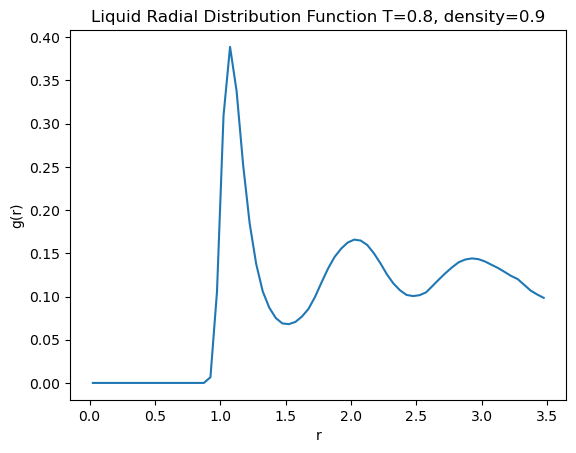

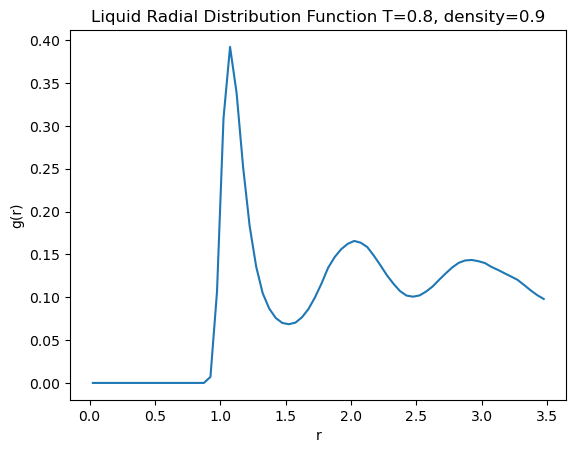

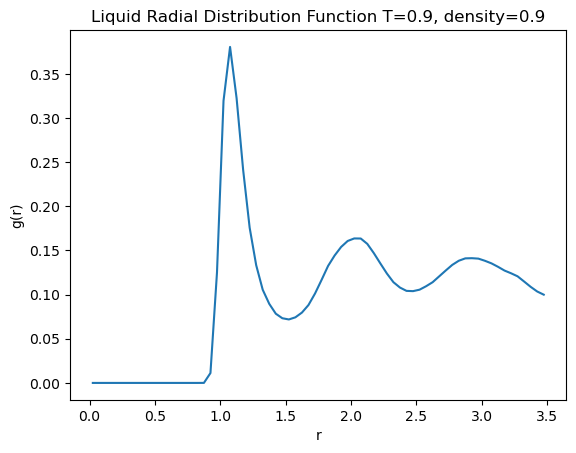

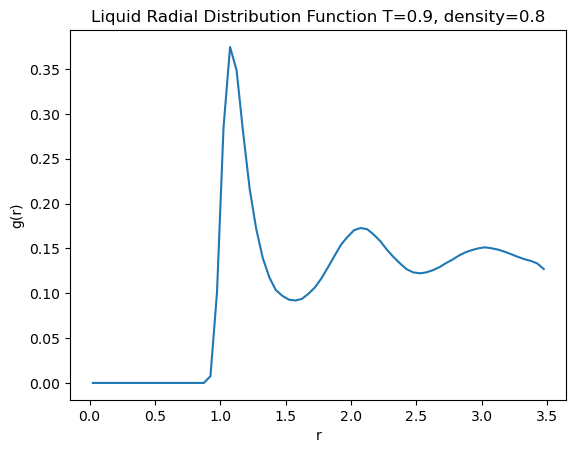

In [29]:
for g_r, T, d in zip(liquid_g_rs, Ts, densitys):
    # print(g_r.histo)
    fig, ax = plt.subplots()
    g_r.lineplot(ax)
    ax.set_xlabel('r')
    ax.set_ylabel('g(r)')
    ax.set_title(f'Liquid Radial Distribution Function T={T}, density={d}')
    dir = f'Visualizations/project_4/liquid/liquid_{T}_{d}_g.png'
    plt.savefig(dir)

# Project 4 - Part 5

Starting initially with the FCC structure gives the correct final atom configurations and radial distribution functions with increasing temperatures and decreasing pressures from solid FCC phase to the liquid phase. Starting from the liquid phase, or a distantly spaced simple cubic lattice, all phases end up in the liquid phase with a very small semi-liquid behavior at the highest densities and lowest temperatures. 

The cause of this is likely the initial starting condition. The first five condition start with an unusually high potential energy followed by an immediate response of increased kinetic energy. The initial atom distances in the simple cubic lattice was scaled by the box length / n_sides and a scaling hyperparamter was used to increase the initial distance in the simple cubic lattice to minimize the initial potenetial energy. Despite the significant improved form exploding gradients and non-interacting atoms, finding a balance remains difficult. Some possible ways to address this is to introduce dampening hyperparameters or cutoffs to both the velocity and the potential to prevent exploding graidents. 

One possible way to determine the solid liquid bounary, is to devlop code that quantifies the organization/disorder of particles, such as the Lindemann index. Simulating and determing such quantifier across varying temperature and pressure with both solid and liquid phase initializations, the set of conditions at which the quantifier is identical for both phase is the solid-liquid boundary. 

# Project 4 - Part 6

In [185]:
def compute_mean_square_displacement(positions, dt, shift_t):
    """
    positions: shape (N, M, 3)
    """
    M = positions.shape[1]
    N = positions.shape[0]
    q = max(1, int(shift_t / dt))  # Avoid division by zero
    n = M - q  # Max number of time shifts
    msd = np.zeros(n)

    for j in range(n):
        displacements = positions[:, j:, :] - positions[:, :M - j, :]
        squared_displacements = np.sum(displacements ** 2, axis=-1)
        msd[j] = np.mean(squared_displacements)
    
    return msd


def compute_velocity_autocorrelation(velocities, dt, shift_t):
    """
    velocities: shape (N, M, 3)
    """
    M = velocities.shape[1]
    N = velocities.shape[0]
    q = max(1, int(shift_t / dt))  # Avoid division by zero
    n = M - q
    vacf = np.zeros(n)

    for j in range(n):
        dots = np.sum(
            velocities[:, j:, :] * velocities[:, :M - j, :],
            axis=-1
        )
        vacf[j] = np.mean(dots) / 3.0  # Average over dimensions

    return vacf


In [190]:
N = 256
delta_t = 0.001
total_time = 20
N_steps = int(total_time/delta_t) 
T = 1.5
k_coll = 1

densitys = [0.1, 0.6]
box_lengths = [(N / density) ** (1/3) for density in densitys]
r_cuts = [min(box_length/2, 3.0) for box_length in box_lengths]
r_cut_squareds = [r_cut**2 for r_cut in r_cuts] 

r = init_config(N, box_lengths[0], 0.97)
v = np.zeros((N,3))

r_trajs = []
v_trajs = []

for density, box_length, r_cut_squared in zip(densitys, box_lengths, r_cut_squareds):
    kinetic_traj = []
    potential_traj = []
    
    r = init_config(N, box_length)
    v = np.zeros((N,3))
    r_traj = np.zeros((N, N_steps, 3))
    v_traj = np.zeros((N, N_steps, 3))
    
    forces, potential_energy = compute_forces_and_potential(N, r, box_length, r_cut_squared)
    
    for step in tqdm(range(N_steps)):
        v, r, forces, potential_energy, kinetic_energy = velocity_verlet(v, r, forces, potential_energy, delta_t, N, box_length, r_cut_squared)
        
        kinetic_traj.append(kinetic_energy)
        potential_traj.append(potential_energy)
    
        v = metropolis(v, N, k_coll=k_coll, delta_t=delta_t, T=T)

        if step >= 7500 and step % 10 == 0:
            r_traj[:, step, :] = r
            v_traj[:, step, :] = v

    r_trajs.append(r_traj)
    .append(v_traj)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:41<00:00, 196.99it/s]


In [195]:
from scipy.stats import linregress

dt_sampled = delta_t * 100
shift_t = max(dt_sampled, 0.01)

for r_traj, v_traj, density in zip(r_trajs, v_trajs, densitys):
    r_traj_trunc = r_traj[:, 7500::100, :]
    v_traj_trunc = v_traj[:, 7500::100, :]
    
    msd = compute_mean_square_displacement(r_traj_trunc, dt_sampled, shift_t)
    vacf = compute_velocity_autocorrelation(v_traj_trunc, dt_sampled, shift_t)
    
    print(f'Density: {density}')
    
    D_gk = np.trapezoid(vacf, dx=dt_sampled)
    print("Green-Kubo Diffusion Coefficient:", D_gk)
    
    t_array = np.arange(len(msd)) * dt_sampled
    slope, _, _, _, _ = linregress(t_array[int(len(msd)/2):], msd[int(len(msd)/2):])
    D_msd = slope / 6.0
    print("MSD Diffusion Coefficient:", D_msd)

Density: 0.1
Green-Kubo Diffusion Coefficient: 0.6838007043771942
MSD Diffusion Coefficient: 0.7272201669715193
Density: 0.6
Green-Kubo Diffusion Coefficient: 0.14909082283807035
MSD Diffusion Coefficient: 0.17164608577995386


The two methods appear consistent overall. The system with the higher density has a lower diffusion coefficient, which is comsistent with intuition. 